# Predictive Analysis of Violent Sexual Crimes
**Emily Nguyen, Kaylynn Francisco-Nelson, Jennifer Cotto Miranda**

### Introduction
---
This study investigates whether it is possible to predict the likelihood of a violent sexual crime being committed by analyzing patterns in location, time of day, and victim demographics. The goal is to determine if these variables can be used to develop predictive models that identify high-risk situations or environments, enabling law enforcement and communities to implement more preventative strategies.

Despite growing efforts to address sexually violent crimes, significant delays in reporting remain a persistent challenge, particularly among certain demographics. These delays can hinder timely investigations, limit access to victim support services, and distort crime data used for policy and prevention. Understanding patterns in the data of the victims is critical in improving victim outreach and intervention strategies. This study aims to analyze police reported data to identify which demographic and contextual factors are most strongly associated with reporting delays, and to explore how these insights can inform data-driven approaches to victim support and crime prevention.

Our data exploration will be aimed at answering the following question: What victim (age, sex, descent), situational, and contextual factors influence the reporting delay in sexual crimes, and can we identify patterns that explain why some incidents are reported immediately while others experience significant delays?

### Data Description
---
The "Crime Data from 2020 to Present" dataset used in this analysis contains 1,004,991 samples, each row representing a crime incident from the Los Angeles Open Data Portal. The dataset is structured as a comma-separated values (CSV) file in tabular format, where each row represents a single reported incident. There are **28 columns** in total, including crime incident number, report date, occurence data & time, crime description, victim demographics, location, weapon use, etc. Here is a brief description of the variables we will focus on:
- **DR_NO**: Division of Records number (unique case/incident ID).
- **Date Rptd**: Date the crime was reported to LAPD. 
- **DATE OCC**: Date the crime actually occurred.  
- **TIME OCC**: Time the crime occurred (24-hour, rounded to the nearest 5 min).
- **AREA**: Numeric code for LAPD geographic area.  
- **AREA NAME**: Name of LAPD geographic area (e.g., "Hollywood").
- **Part 1-2**: Indicates whether the crime is Part I (serious) or Part II (less serious).
- **Crm Cd**: Numeric crime code. 
- **Crm Cd Desc**: Text description of the crime (e.g., “Burglary”).
- **Mocodes**: Modus operandi codes describing methods/characteristics of the crime.  
- **Vict Age**: Age of the victim.  
- **Vict Sex**: Sex of the victim (`M`, `F`, `X`, or blank).  
- **Vict Descent**: Ethnic/racial descent code of the victim (e.g., `H` = Hispanic, `B` = Black).  
- **Premis Cd**: Code indicating the type of premise (location type).  
- **Premis Desc**: Text description of premise (e.g., “Street,” “Residence”).  
- **Weapon Used Cd**: Code for weapon used, if applicable.  
- **Weapon Desc**: Text description of weapon (e.g., “Handgun”).  
- **LOCATION**: Approximate address of the crime. 

Here are the first and last few rows of the dataset for reference:

In [2]:
# imports/setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [3]:
# get the number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 1004991
Number of columns: 28


### Data Cleaning
---
As we are focusing on **violent sexual crimes** reported in Los Angeles since 2020, we will narrow our analysis to incidents that fall under this cateogry and uncover trends related to time, location, & victim demogrpahics. We will define violent sexual crimes as:
- Rape, Forcible
- Battery with sexual contact
- SEXUAL PENETRATION W/FOREIGN OBJECT
- LEWD CONDUCT
- SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)
- ORAL COPULATION
- SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH
- HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
- RAPE, ATTEMPTED
- PIMPING
- LEWD/LASCIVIOUS ACTS WITH CHILD

**Filtering for Violent Sexual Crimes**

In [4]:
# looking at unique values in 'Crm Cd Desc' column
df['Crm Cd Desc'].unique()

array(['THEFT OF IDENTITY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VEHICLE - ATTEMPT STOLEN',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
       'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY WITH SEXUAL CONTACT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'V

In [5]:
# keywords of interest
keywords = [
    "SEX", "RAPE", "LASCIVIOUS", "MOLEST", "SODOMY", "INCEST", 
    "BATTERY WITH SEXUAL CONTACT", "ORAL", "ANAL", "FORCIBLE", "STATUTORY"
]

# case insensitive pattern
pattern = '|'.join(keywords)

# filter the DataFrame for violent sexual crimes
sexual_crimes_df = df[df['Crm Cd Desc'].str.contains(pattern, case=False, na=False)]

In [6]:
crime_counts = (
    sexual_crimes_df
    .groupby(['Crm Cd', 'Crm Cd Desc'])
    .size()
    .reset_index(name='Case_Count')
    .sort_values(by='Case_Count', ascending=False)
)

print(crime_counts)

    Crm Cd                                        Crm Cd Desc  Case_Count
11     860                        BATTERY WITH SEXUAL CONTACT        4163
0      121                                     RAPE, FORCIBLE        3756
4      815                SEXUAL PENETRATION W/FOREIGN OBJECT        1321
3      810  SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...        1081
10     845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         966
5      820                                    ORAL COPULATION         727
6      821  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...         531
7      822            HUMAN TRAFFICKING - COMMERCIAL SEX ACTS         479
1      122                                    RAPE, ATTEMPTED         319
2      760                    LEWD/LASCIVIOUS ACTS WITH CHILD          86
9      840  BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT...           9
8      830       INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)           6


Since 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE' isn't a violent crime, we will drop rows with this crime. 

In [7]:
# dropping by code: SEX OFFENDER REGISTRANT OUT OF COMPLIANCE - code 845
sexual_crimes_df = sexual_crimes_df[sexual_crimes_df['Crm Cd'] != 845]

In [8]:
# looking at unique values in 'Crm Cd Desc' after filtering out non-violent sexual crimes
sexual_crimes_df['Crm Cd Desc'].unique()

array(['BATTERY WITH SEXUAL CONTACT', 'LEWD/LASCIVIOUS ACTS WITH CHILD',
       'RAPE, ATTEMPTED',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'RAPE, FORCIBLE',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ORAL COPULATION', 'SEXUAL PENETRATION W/FOREIGN OBJECT',
       'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
       'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
       'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'], dtype=object)

In [9]:
num_rows, num_cols = sexual_crimes_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 12478
Number of columns: 28


**Handling Missing Values**

In [10]:
# check for missing values in each column
sexual_crimes_df.isna().sum().sort_values(ascending=False)

Crm Cd 4          12461
Crm Cd 3          12093
Cross Street       9574
Crm Cd 2           8717
Weapon Used Cd     1133
Weapon Desc        1133
Mocodes              87
Vict Sex             13
Vict Descent         13
Premis Desc           1
DATE OCC              0
DR_NO                 0
Vict Age              0
Crm Cd Desc           0
Crm Cd                0
Part 1-2              0
AREA NAME             0
Rpt Dist No           0
AREA                  0
TIME OCC              0
Date Rptd             0
Status Desc           0
Premis Cd             0
Status                0
Crm Cd 1              0
LOCATION              0
LAT                   0
LON                   0
dtype: int64

The dataset includes multiple versions of the crime code (Crm Cd 2, Crm Cd 3, Crm Cd 4), but we only need the main Crm Cd column for our analysis. In the cell below, we drop these extra columns to clean up the dataset, since these columns hold such a large amount of missing values. Additionally, we will drop the columns that aren't necessary for our analysis to clean up the dataset.

In [11]:
# dropping columns that have large amounts of missing values
sexual_crimes_df = sexual_crimes_df.drop(columns=["Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])

In [12]:
# dropping columns that aren't necessary for our analysis
sexual_crimes_df = sexual_crimes_df.drop(columns=["Cross Street", "LAT", "LON"])

**Rows with 0s or Xs**

In [13]:
# count rows where Vict Age is 0 - assuming 0 is babies
num_rows = (sexual_crimes_df['Vict Age'] == 0).sum()
print(f"Number of rows with Vict Age = 0: {num_rows}")

Number of rows with Vict Age = 0: 129


In [14]:
# count rows where Gender is 'X' - missing/unknown
num_rows = (sexual_crimes_df['Vict Sex'] == 'X').sum()
print(f"Number of rows where Vict Sex = 'X': {num_rows}")

# Drop rows where Vict Sex is 'X'
sexual_crimes_df = sexual_crimes_df[sexual_crimes_df['Vict Sex'] != 'X']

# count rows where descent is 'X' - missing/unknown
num_rows = (sexual_crimes_df['Vict Descent'] == 'X').sum()
print(f"Number of rows where Vict Descent = 'X': {num_rows}")

# Drop rows where Vict Descent is 'X'
sexual_crimes_df = sexual_crimes_df[sexual_crimes_df['Vict Descent'] != 'X']

Number of rows where Vict Sex = 'X': 54
Number of rows where Vict Descent = 'X': 53


In [2]:
# get the number of rows and columns
num_rows, num_cols = sexual_crimes_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

NameError: name 'sexual_crimes_df' is not defined

### Exploratory Data Analysis (EDA)
---
In this analysis, we are exploring patterns in sexual crime reports with a focus on three key aspects:
1. Victim Demographics: Understanding the distribution of victims by gender and racial/ethnic background to identify which groups are most affected.
2. Time and Reporting Delay: Examining when incidents occur and how long it takes for victims to report them, to uncover patterns in reporting behavior.
3. Location: Analyzing the geographic distribution of crimes, specifically by area, to identify hotspots and trends.

This exploration helps provide context for understanding the factors influencing both the occurrence and reporting of sexual crimes.

In [ ]:
#displays summary of the numeric columns
print("Summary Statistics - Numeric")
display(sexual_crimes_df.describe().T)

Summary Statistics - Numeric


,count,mean,std,min,25%,50%,75%,max
DR_NO,12371.0,2.190035e+08,1.260600e+07,200100501.0,210413246.0,220616249.0,230707338.0,251904123.0
TIME OCC,12371.0,1.193241e+03,7.475342e+02,1.0,500.0,1200.0,1830.0,2359.0
AREA,12371.0,1.062784e+01,6.263989e+00,1.0,5.0,11.0,16.0,21.0
Rpt Dist No,12371.0,1.108714e+03,6.260664e+02,101.0,563.0,1144.0,1641.0,2198.0
Part 1-2,12371.0,1.465605e+00,4.988357e-01,1.0,1.0,1.0,2.0,2.0
Crm Cd,12371.0,6.024840e+02,3.368459e+02,121.0,121.0,815.0,860.0,860.0
Vict Age,12371.0,2.734799e+01,1.444234e+01,-2.0,16.0,24.0,35.0,99.0
Premis Cd,12371.0,3.935121e+02,2.154451e+02,101.0,109.0,501.0,502.0,971.0
Weapon Used Cd,11269.0,3.990334e+02,4.363427e+01,101.0,400.0,400.0,400.0,515.0
Crm Cd 1,12371.0,6.000432e+02,3.365062e+02,121.0,121.0,815.0,860.0,860.0


#### Victim Demographics
**Gender Distribution by Crime Type**: 
- Across all sexual crimes, the majority of victims are female (11,212, 90.7%), while male victims are much fewer (1,146, 9.3%).
- Certain crimes have slightly more balanced gender counts, for example:
    - Sodomy/Sexual Contact Between Penis and Anus has 260 female victims and 267 male victims, showing nearly equal distribution.
    - Crimes like Rape, Forcible and Battery with Sexual Contact overwhelmingly affect females.
    - Battery with Sexual Content (4133) and Rape, Forcible (3739) have the highest number of cases. 

**Racial/Ethnic Distribution of Victims**:
- Hispanic victims make up the largest portion of violent sexual crimes at 47.6%, followed by White victims at 23.3% and Black victims at 20.9%.
- Asian victims account for 2.9%, while Other races are 5.4%.
- This suggests a significant overrepresentation of Hispanic victims in the dataset.

**Age of Victims**:
- The majority of victims are Adults (25–49), with 4,896 victims, representing the largest age group in the dataset. Adolescents (13–17) and Young Adults (18–24) are also heavily affected, with 2,997 and 2,462 victims, respectively. Children (0–12) account for 798 victims, showing that sexual crimes also impact very young individuals. Older Adults (50+) represent 1,098 victims, indicating that sexual crimes span all age ranges, though at lower frequencies in older populations.


**Overall Insights**:
- Sexual crimes in this dataset predominantly affect female victims, with Hispanic, White, and Black victims forming the majority across all reported incidents.
- A few crimes show more gender balance, but these are exceptions rather than the rule.
- Sexual crimes disproportionately affect young and middle-aged populations, but no age group is entirely spared.

In [ ]:
ct = pd.crosstab(sexual_crimes_df["Crm Cd Desc"], sexual_crimes_df["Vict Sex"], margins=True)
display(ct)

Vict Sex,F,M,All
Crm Cd Desc,,,
BATTERY WITH SEXUAL CONTACT,3758,375,4133
"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",2,5,7
HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,453,3,456
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),4,2,6
LEWD/LASCIVIOUS ACTS WITH CHILD,75,10,85
ORAL COPULATION,531,185,716
"RAPE, ATTEMPTED",314,4,318
"RAPE, FORCIBLE",3707,32,3739
"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",935,127,1062


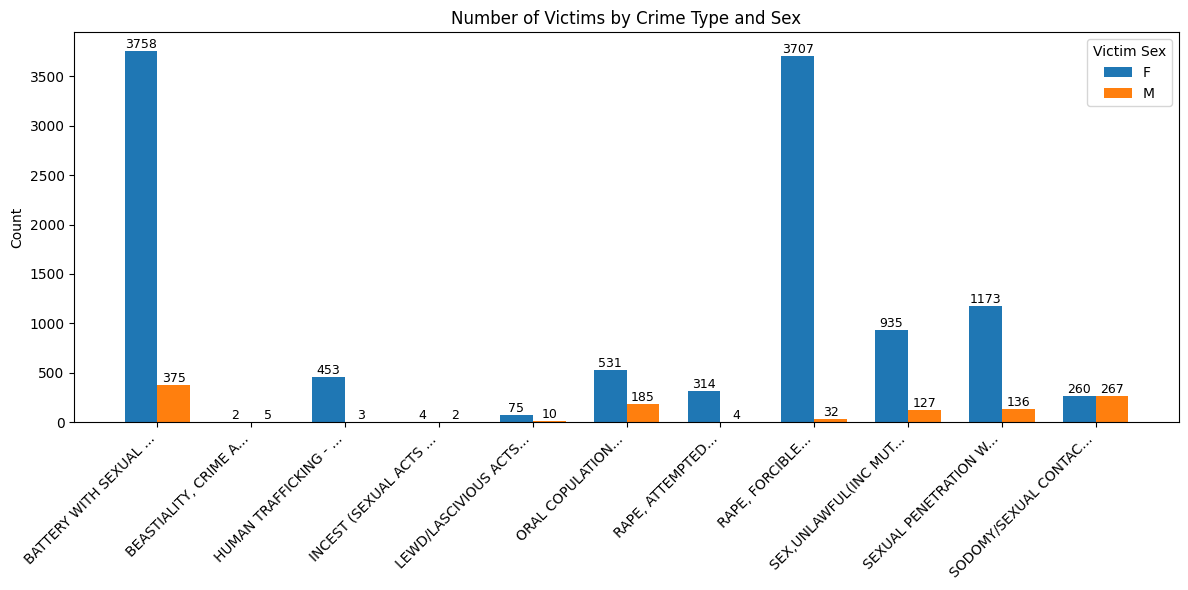

In [ ]:
# Create crosstab WITHOUT the 'All' row/column
ct = pd.crosstab(sexual_crimes_df["Crm Cd Desc"], sexual_crimes_df["Vict Sex"])
ct.index = ct.index.str.slice(0, 20) + '...'

categories = ct.index
victim_sexes = ct.columns
x = np.arange(len(categories))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12,6))

# Plot bars for each Vict Sex
for i, sex in enumerate(victim_sexes):
    ax.bar(x + i*width, ct[sex], width, label=sex)
    
    # Add numbers on top of each bar
    for j, val in enumerate(ct[sex]):
        ax.text(x[j] + i*width, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_xticks(x + width/2)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.set_ylabel('Count')
ax.set_title('Number of Victims by Crime Type and Sex')
ax.legend(title='Victim Sex')
plt.tight_layout()
plt.show()

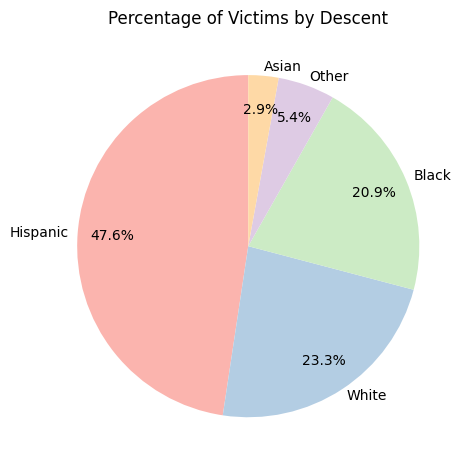

In [ ]:
descent_map = {
    'H': 'Hispanic',
    'W': 'White',
    'B': 'Black',
    'O': 'Other',
    'A': 'Asian'
}

# Keep only rows with mapped descent codes
sexual_crimes_df = sexual_crimes_df[sexual_crimes_df['Vict Descent'].isin(descent_map.keys())]

# Map the codes to full names
sexual_crimes_df['Vict Descent Full'] = sexual_crimes_df['Vict Descent'].map(descent_map)

# Count percentages
status_counts = sexual_crimes_df['Vict Descent Full'].value_counts(normalize=True) * 100

# Plot
status_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    labeldistance=1.05,
    pctdistance=0.8
)
plt.ylabel('')
plt.title('Percentage of Victims by Descent')
plt.tight_layout()
plt.show()

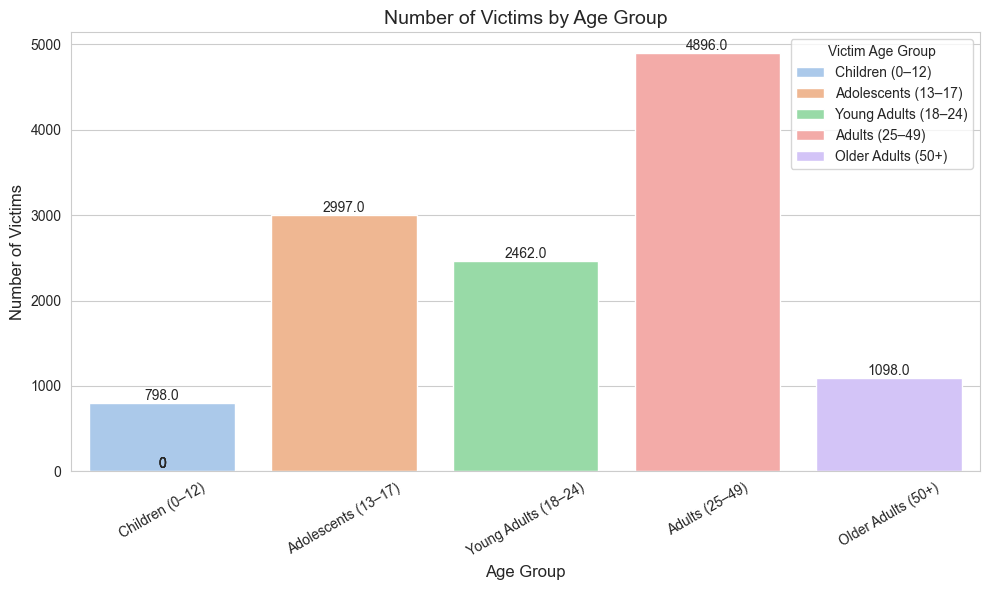

In [ ]:
# Define Age Groups
bins = [0, 12, 17, 24, 49, 120]
labels = ['Children (0–12)', 'Adolescents (13–17)', 'Young Adults (18–24)', 'Adults (25–49)', 'Older Adults (50+)']

# Create Age Group column
sexual_crimes_df['Victim Age Group'] = pd.cut(
    sexual_crimes_df['Vict Age'],
    bins=bins,
    labels=labels,
    right=True
)

# Set Seaborn style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=sexual_crimes_df,
    x='Victim Age Group',
    order=labels,
    hue="Victim Age Group",
    palette="pastel"
)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title("Number of Victims by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Victims", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### Time
In terms of time of day so far with the data we have we have noted that

**Time of Day**
- Violent sexual crimes are nearly even across the different times of day (ex. Morning (6am-12pm), Afternoon (12pm-6pm), Evening (6pm-12am), Night (12am-6am)). However, there were peaks noted at 12am and 12pm

**Breakdown into Months**
- The number of sexual crimes peak at the beginning of the year in Janurary. From there they steadily decline as the year goes by except for spikes in September and October.

**Day of the Week**
- The distribution of violent sexual crimes is nearly even through out the days of the week. Except for a slight incline going into and through the weekend.

**Reporting Delays**
- When it comes to delays in reporting these violent sexual crimes most of the reportings happen within a week of the crime occuring. With a steep decline afterwards, except for the spike that occurs between 1-12 months of the crime happenening. After a year the data shows the numbers take a steap decline.

TIME ANALYSIS


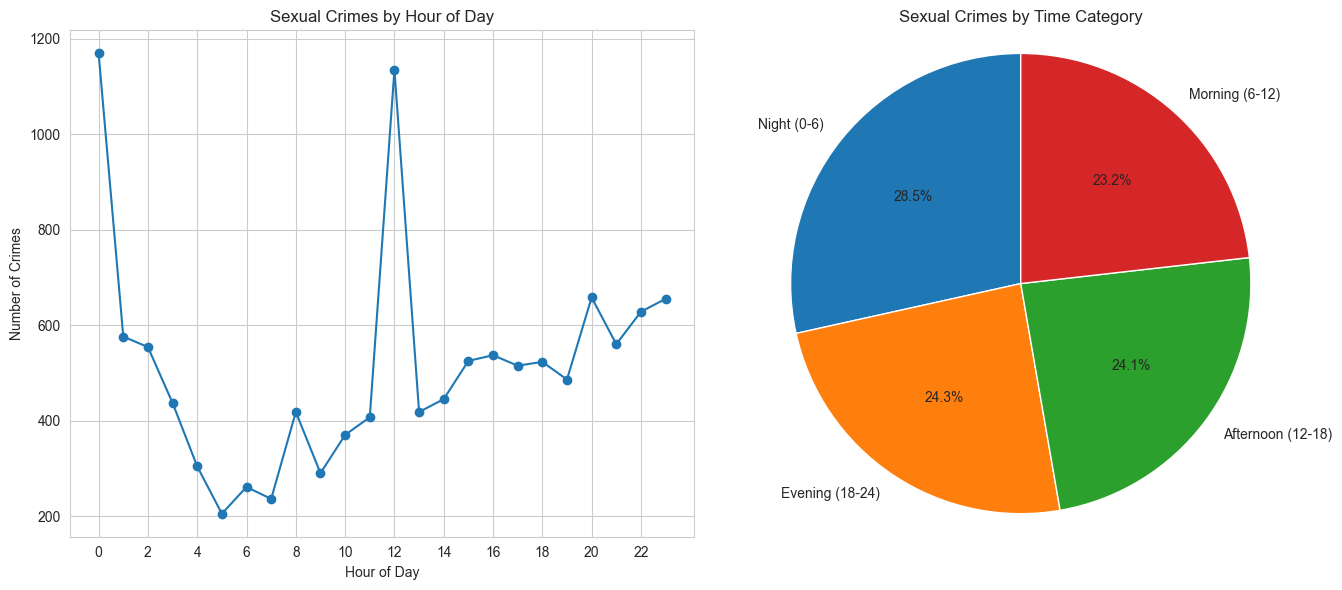

In [ ]:
# Time Analysis
print("TIME ANALYSIS")


# Convert TIME OCC to proper time format
def convert_time_occ(time_occ):
    """Convert TIME OCC (4-digit number) to time string"""
    time_str = str(time_occ).zfill(4)
    return f"{time_str[:2]}:{time_str[2:]}"

sexual_crimes_df['Time_Formatted'] = sexual_crimes_df['TIME OCC'].apply(convert_time_occ)
sexual_crimes_df['Hour'] = sexual_crimes_df['TIME OCC'] // 100

# Create time categories
sexual_crimes_df['Time_Category'] = pd.cut(sexual_crimes_df['Hour'], 
                                          bins=[0, 6, 12, 18, 24], 
                                          labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)'],
                                          include_lowest=True)

plt.figure(figsize=(14, 6))

# Hourly distribution
plt.subplot(1, 2, 1)
hourly_counts = sexual_crimes_df['Hour'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Sexual Crimes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 24, 2))

# Time category distribution
plt.subplot(1, 2, 2)
time_cat_counts = sexual_crimes_df['Time_Category'].value_counts()
plt.pie(time_cat_counts.values, labels=time_cat_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sexual Crimes by Time Category')
plt.axis('equal')

plt.tight_layout()
plt.show()


TEMPORAL TRENDS


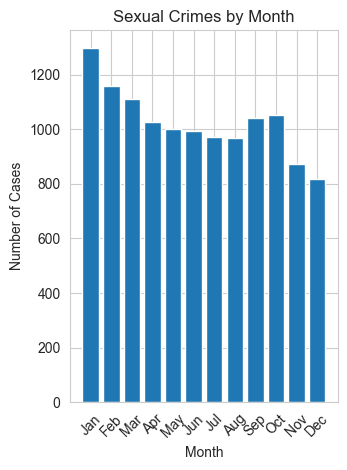

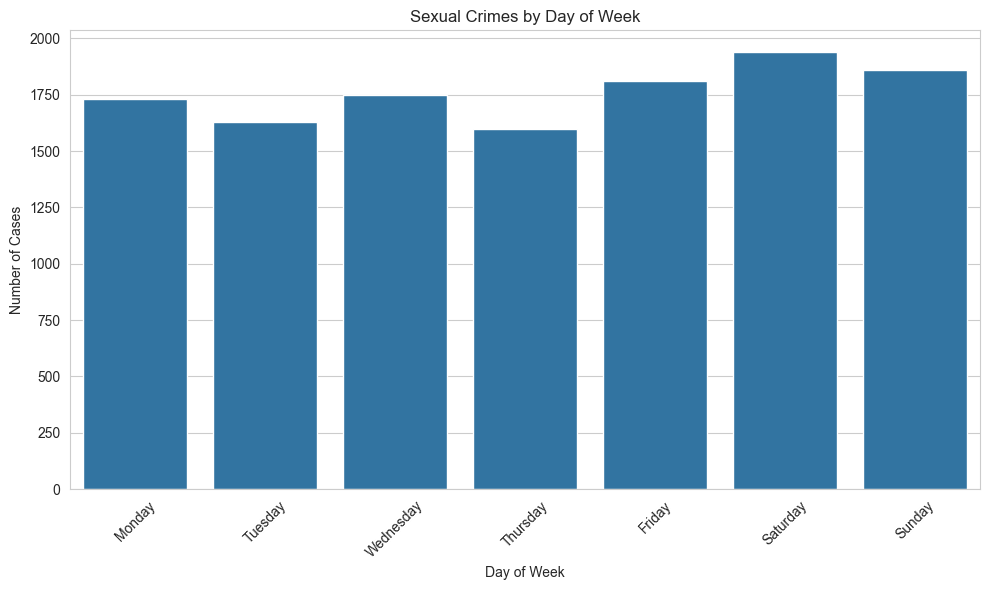

In [ ]:
print("TEMPORAL TRENDS")

# Convert date columns to datetime
sexual_crimes_df['DATE OCC'] = pd.to_datetime(sexual_crimes_df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
sexual_crimes_df['Date Rptd'] = pd.to_datetime(sexual_crimes_df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract year and month
sexual_crimes_df['Year'] = sexual_crimes_df['DATE OCC'].dt.year
sexual_crimes_df['Month'] = sexual_crimes_df['DATE OCC'].dt.month
sexual_crimes_df['DayOfWeek'] = sexual_crimes_df['DATE OCC'].dt.day_name()


# Monthly trends
monthly_trends = sexual_crimes_df['Month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplot(1, 2, 2)
plt.bar(month_names, monthly_trends.values)
plt.title('Sexual Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# Day of week analysis
dow_counts = sexual_crimes_df['DayOfWeek'].value_counts()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.barplot(x=dow_order, y=[dow_counts.get(day, 0) for day in dow_order])
plt.title('Sexual Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Reporting Delay Analysis (Excluding 0 days delay)
print("REPORTING DELAY ANALYSIS (Excluding Same-Day Reporting)")

sexual_crimes_df['Reporting_Delay'] = (sexual_crimes_df['Date Rptd'] - sexual_crimes_df['DATE OCC']).dt.days

# Filter out 0 days delay (same-day reporting)
delayed_reports = sexual_crimes_df[sexual_crimes_df['Reporting_Delay'] > 0].copy()

delayed_reports['Delay_Category'] = pd.cut(delayed_reports['Reporting_Delay'], 
                                          bins=[0, 7, 30, 365, float('inf')],
                                          labels=['1-7 days', '8-30 days', '1-12 months', 'Over 1 year'])
plt.figure(figsize=(14, 6))

# Calculate statistics
print(f"Cases with delayed reporting (>0 days): {len(delayed_reports):,}")
print(f"Percentage of cases with delayed reporting: {(len(delayed_reports)/len(sexual_crimes_df)*100):.1f}%")
print(f"Average reporting delay: {delayed_reports['Reporting_Delay'].mean():.2f} days")
print(f"Median reporting delay: {delayed_reports['Reporting_Delay'].median()} days")
print(f"Maximum reporting delay: {delayed_reports['Reporting_Delay'].max()} days")
print(f"Minimum reporting delay (excluding 0): {delayed_reports['Reporting_Delay'].min()} days")


delay_categories = delayed_reports['Delay_Category'].value_counts().sort_index()

REPORTING DELAY ANALYSIS (Excluding Same-Day Reporting)
Cases with delayed reporting (>0 days): 8,123
Percentage of cases with delayed reporting: 66.0%
Average reporting delay: 95.56 days
Median reporting delay: 8.0 days
Maximum reporting delay: 1862 days
Minimum reporting delay (excluding 0): 1 days


<Figure size 1400x600 with 0 Axes>

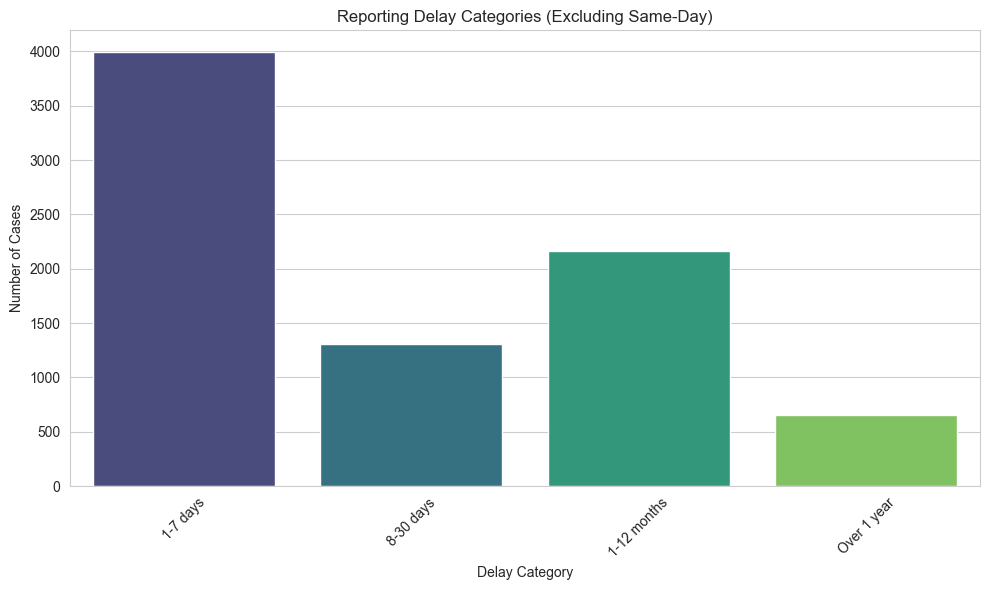


Breakdown by delay categories:
1-7 days: 3,993 cases (49.2%)
8-30 days: 1,312 cases (16.2%)
1-12 months: 2,166 cases (26.7%)
Over 1 year: 652 cases (8.0%)

Top 5 crime types with longest average reporting delays:
              mean  median  count
Crm Cd                           
760     192.914894    24.0     47
810     136.344754    62.5    934
820     120.020408    12.0    490
815     108.623853     6.0    981
121      90.468475     5.0   2728

Top 5 crime types with shortest average reporting delays:
             mean  median  count
Crm Cd                          
822     80.314741    13.0    251
860     75.857474     6.0   2154
122     65.489209     2.0    139
840     42.333333     2.0      6
830     36.250000    30.5      4


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=delay_categories.index, y=delay_categories.values, hue=delay_categories.index, dodge=False, legend=False, palette='viridis')
plt.title('Reporting Delay Categories (Excluding Same-Day)')
plt.xlabel('Delay Category')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nBreakdown by delay categories:")
for category, count in delay_categories.items():
    percentage = (count / len(delayed_reports)) * 100
    print(f"{category}: {count:,} cases ({percentage:.1f}%)")

# Analyze if certain crime types have longer reporting delays
delay_by_crime = delayed_reports.groupby('Crm Cd')['Reporting_Delay'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

print("\nTop 5 crime types with longest average reporting delays:")
print(delay_by_crime.head(5))

print("\nTop 5 crime types with shortest average reporting delays:")
print(delay_by_crime.tail(5))

#### Location
**Location hotspots:** 
- Areas 77th Street and Central represent the primary hotspots. They account for 25% of all sexual crimes.

**Area Patterns:**
- Central Area shows as the most concerning area across multiple variables. It appears 4 out of 10 times when evaluating the Top 10 Crime patterns based on Crime Code, Time, and Area.
- Central has the highest frequency for Crime Code 860 in the Afternoon and Crime Code 121 at Night.
- Central shows consisten cconcerns through other day parts.

**Overall Insights**
- 20% of the Areas are driving 50% of sexual crimes, with predictable patterns the enable precise, proactive intervention rather than reactive repsonses.
- Areas Central, 77th Street, Hollywood, West LA, and Rampart should take priority for immediate community resourse allocations. 

AREA ANALYSIS
Sexual Crimes by Area:
AREA NAME
77th Street    986
Central        982
Hollywood      813
Southwest      728
Olympic        693
Rampart        655
Southeast      648
Pacific        606
N Hollywood    586
Newton         581
Mission        568
West Valley    539
West LA        505
Wilshire       489
Topanga        477
Harbor         472
Devonshire     437
Foothill       419
Van Nuys       406
Hollenbeck     364
Northeast      358
Name: count, dtype: int64


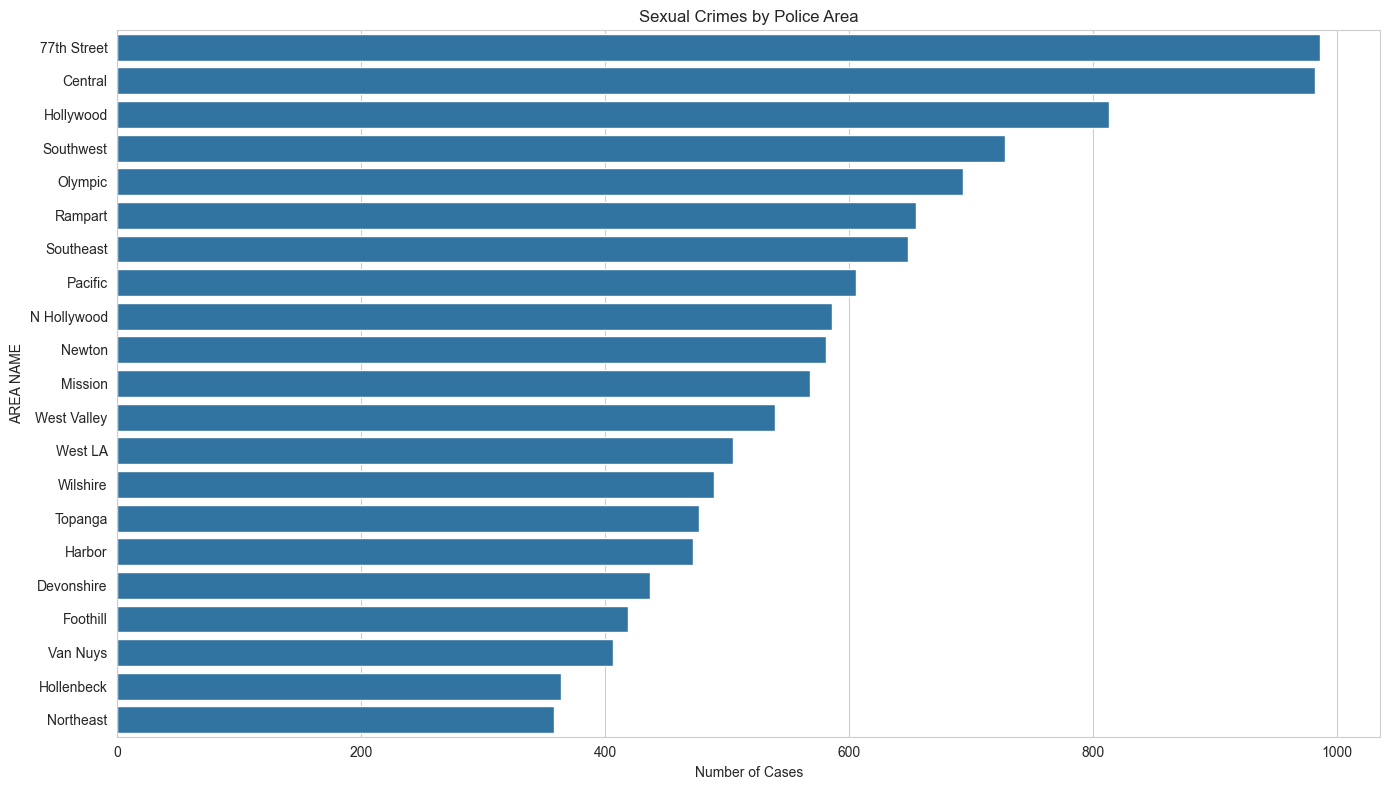

In [ ]:
# Area Analysis
print("AREA ANALYSIS")

area_counts = sexual_crimes_df['AREA NAME'].value_counts()
print("Sexual Crimes by Area:")
print(area_counts)

plt.figure(figsize=(14, 8))
sns.barplot(x=area_counts.values, y=area_counts.index)
plt.title('Sexual Crimes by Police Area')
plt.xlabel('Number of Cases')
plt.tight_layout()
plt.show()

In [ ]:
# Crime Code Patterns by Time and Location
print("CRIME PATTERNS ANALYSIS")

crime_patterns = (
    sexual_crimes_df
    .groupby(['Crm Cd', 'Time_Category', 'AREA NAME'], observed=False)
    .size()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Crime Patterns (Crime Code + Time + Area):")
print(crime_patterns)

CRIME PATTERNS ANALYSIS
Top 10 Crime Patterns (Crime Code + Time + Area):
Crm Cd  Time_Category      AREA NAME  
860     Afternoon (12-18)  Central        140
121     Night (0-6)        Central        139
                           77th Street    116
                           Hollywood      110
860     Morning (6-12)     Central        106
121     Evening (18-24)    Central        100
860     Afternoon (12-18)  West LA         99
121     Evening (18-24)    77th Street     93
        Night (0-6)        Rampart         93
860     Afternoon (12-18)  Hollywood       90
dtype: int64


#### Reporting Delay

In [ ]:
df = delayed_reports.copy()

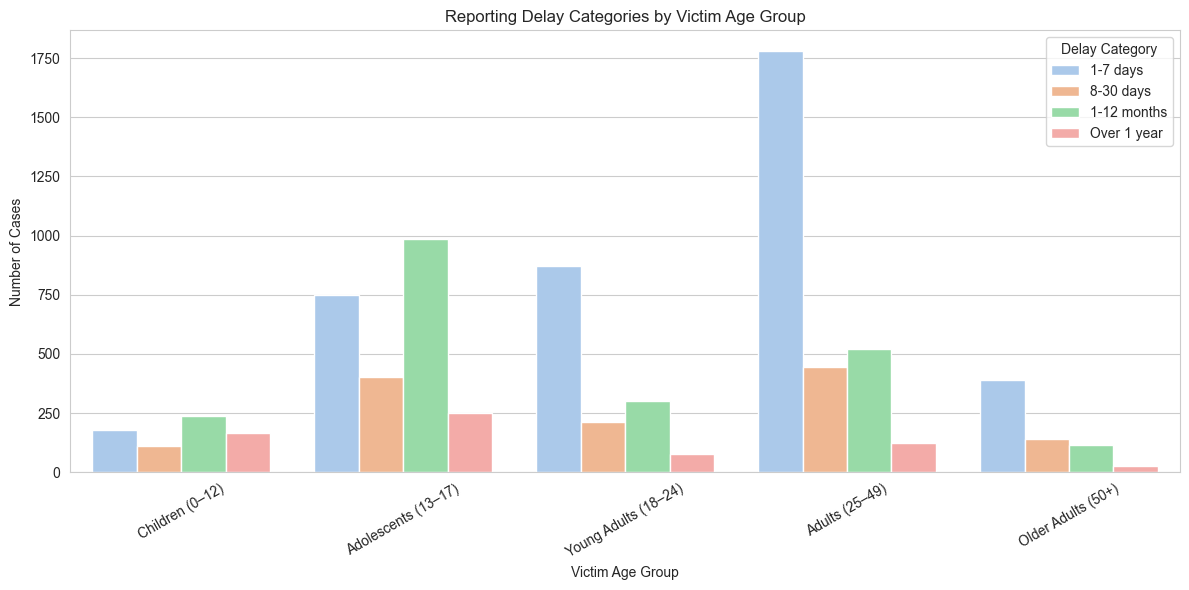

In [ ]:
# bar chart of reporting delay by age group
plt.figure(figsize=(12,6))
sns.countplot(
    data=delayed_reports,
    x='Victim Age Group',
    hue='Delay_Category',
    palette='pastel',
    order=labels,          # keeps age groups in order
    hue_order=['1-7 days','8-30 days','1-12 months','Over 1 year']
)
plt.title('Reporting Delay Categories by Victim Age Group')
plt.xlabel('Victim Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=30)
plt.legend(title='Delay Category')
plt.tight_layout()
plt.show()

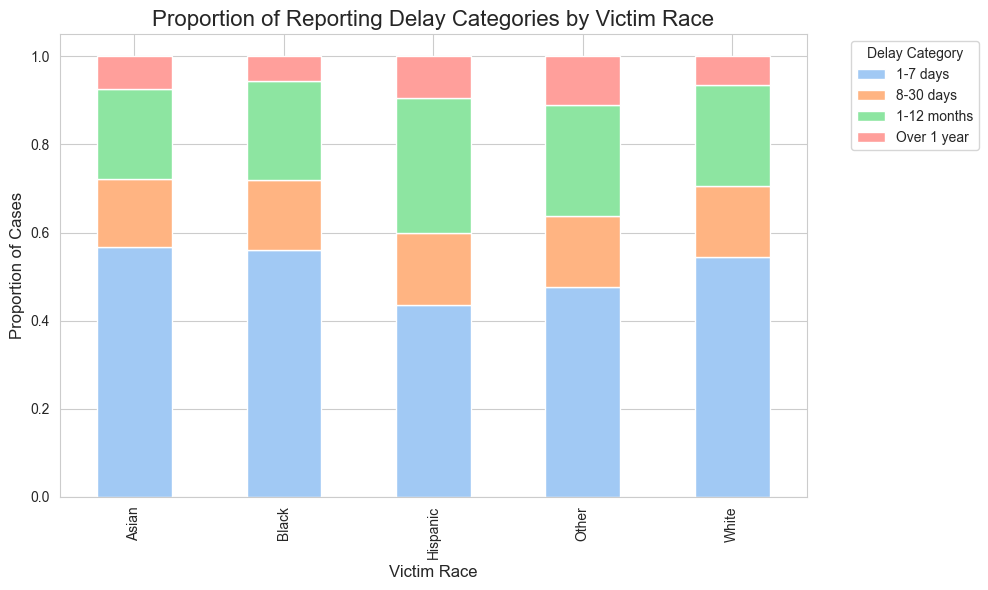

In [ ]:
# Create counts of Delay_Category within each race
delay_counts = pd.crosstab(df['Vict Descent Full'], df['Delay_Category'])

# Convert to proportions (row-wise)
delay_props = delay_counts.div(delay_counts.sum(axis=1), axis=0)
# Make a pastel color palette with as many colors as Delay Categories
colors = sns.color_palette("pastel", n_colors=len(delay_props.columns))

# Plot with pastel colors
delay_props.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=colors
)

plt.title("Proportion of Reporting Delay Categories by Victim Race", fontsize=16)
plt.xlabel("Victim Race", fontsize=12)
plt.ylabel("Proportion of Cases", fontsize=12)
plt.legend(title="Delay Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

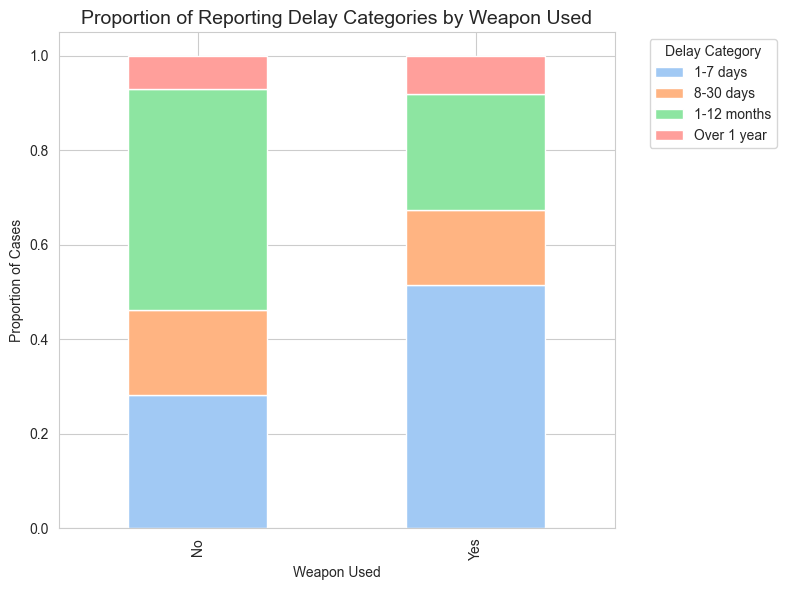

In [ ]:
# Handle None, NONE, empty strings, and NaN
df["Weapon_Used"] = df["Weapon Desc"].apply(
    lambda x: "No" if pd.isna(x) or str(x).strip().upper() == "NONE" else "Yes"
)

# Crosstab with delay categories
weapon_ct = pd.crosstab(df["Weapon_Used"], df["Delay_Category"])
weapon_props = weapon_ct.div(weapon_ct.sum(axis=1), axis=0)

# Plot stacked proportions
weapon_props.plot(kind="bar", stacked=True, figsize=(8,6), color=sns.color_palette("pastel"))
plt.title("Proportion of Reporting Delay Categories by Weapon Used", fontsize=14)
plt.xlabel("Weapon Used")
plt.ylabel("Proportion of Cases")
plt.legend(title="Delay Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

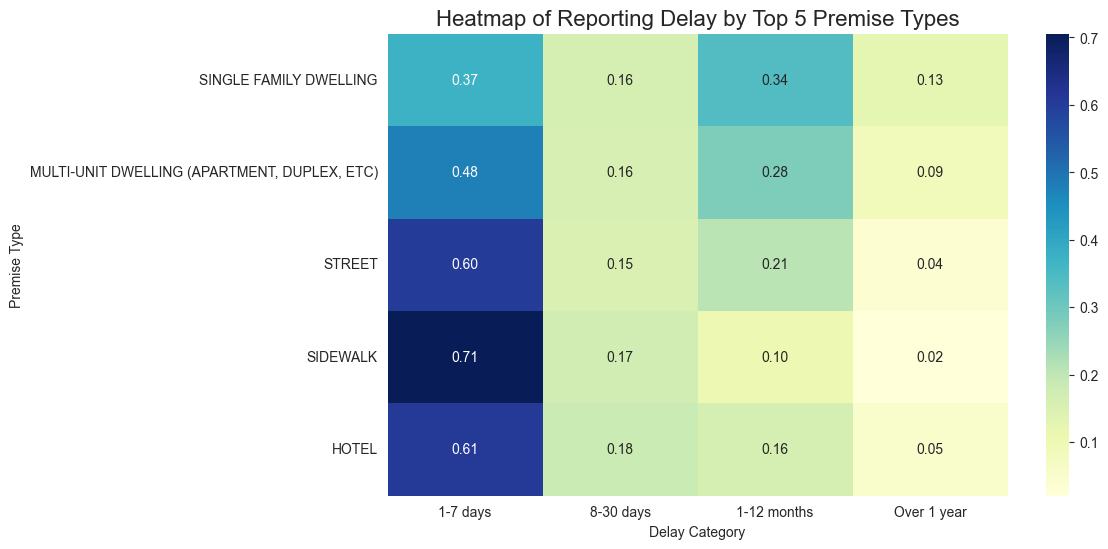

In [ ]:
premise_ct = pd.crosstab(df["Premis Desc"], df["Delay_Category"])
premise_props = premise_ct.div(premise_ct.sum(axis=1), axis=0)

premise_counts = premise_ct.sum(axis=1)

# Get top 5 premises
top5_premises = premise_counts.sort_values(ascending=False).head(5).index

# Subset the proportion table for top 5
premise_props_top5 = premise_props.loc[top5_premises]

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(premise_props_top5, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Reporting Delay by Top 5 Premise Types", fontsize=16)
plt.xlabel("Delay Category")
plt.ylabel("Premise Type")
plt.show()

In [ ]:
# Compute total incidents per premise
premise_counts = premise_ct.sum(axis=1)

# Get top 5 premises by frequency
top5_premises = premise_counts.sort_values(ascending=False).head(5).index

# Subset the counts table for top 5
premise_counts_top5 = premise_ct.loc[top5_premises]

# Display the table
premise_counts_top5

Delay_Category,1-7 days,8-30 days,1-12 months,Over 1 year
Premis Desc,,,,
SINGLE FAMILY DWELLING,874,374,794,298
"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",917,300,534,170
STREET,529,133,181,34
SIDEWALK,170,41,25,5
HOTEL,137,41,36,11


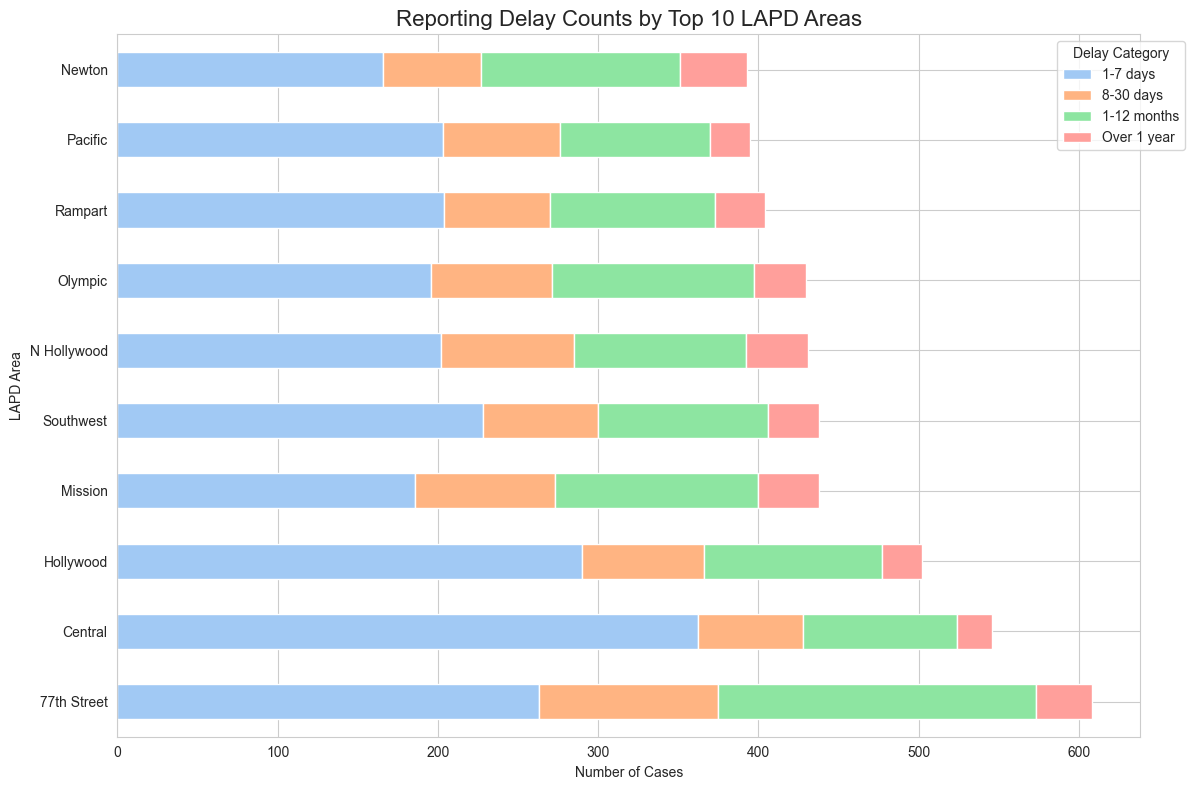

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crosstab of counts
area_ct = pd.crosstab(df["AREA NAME"], df["Delay_Category"])

# Get top 10 areas by total incidents
top10_areas = area_ct.sum(axis=1).sort_values(ascending=False).head(10).index
area_ct_top10 = area_ct.loc[top10_areas]

# Plot horizontal stacked bar chart
area_ct_top10.plot(kind="barh", stacked=True, figsize=(12,8), color=sns.color_palette("pastel"))

plt.title("Reporting Delay Counts by Top 10 LAPD Areas", fontsize=16)
plt.xlabel("Number of Cases")
plt.ylabel("LAPD Area")
plt.legend(title="Delay Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Limitations & Bias
---
Due to the reports being focused on the victim without details, outside of the crime, of the perpitraitor there are several limitations and bias we will need to be aware of as we continue this project.

1. Reporting bias: The dataset is dependent on the crime reported. Sexual related crimes are significantly under reported. This means the data set likely doesn't represent the full spectrum of the crimes, but rather a self-reported subset. This bias means our analysis reflects patterns of reporting potentially more than patterns of criminal activity.

2. Omision of Perpetrator Data: A significant constraint is the absence of variables related to the perpetrator. This forces any predictive model to rely on correlations of victims instead of the causes of criminal behavior.

3. Risk of perpetuating victim-based bias: Due to the data being focused on the victim there is an ethical risk of incorrectly attributing the cause of the crimes to the victims. This can cause a model to target over represented groups . In addition to this causing the model to attribute the cause of the crime to the victim it can also reinforce harmful stereotypes. This can potentially influence policing patterns in a discriminatory way and further traumatize vulnerable communities.

 

### Baseline Model
---

Focusing on the influence of reporting delay given a violent sexual crime, we will use our `Delay_Category` that we made in the EDA as the **target**. 
- This category contains a binned version of the delay in reporting a "violent sexual crime" (1-7 days, 8-30 days etc.) which works well in building a classification logistic regression model.

**Features** will include:
- Victim Demographics:
    - Age
    - Vict Sex
    - Vict Descent
- Situational:
    - Crm CD Desc
    - Premis Desc
- Contexual: 
    - AREA NAME
    - TIME OCC

In [ ]:
# baseline model imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

#### Training/Test Split

In [ ]:
# using the delayed reports dataset for prediction
df = delayed_reports.copy()

# target var (already binned during EDA)
y = df['Delay_Category']

# features to use
X = df[['Vict Age', 'Vict Sex', 'Vict Descent', 
        'Crm Cd Desc', 'Premis Desc', 
        'AREA NAME', 'TIME OCC']]

# split the data (80% train, 20% test), stratified by target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Check distribution in train/test
print("\nTraining target distribution:\n", y_train.value_counts(normalize=True))
print("\nTest target distribution:\n", y_test.value_counts(normalize=True))

Training set size: (6498, 7)
Test set size: (1625, 7)

Training target distribution:
 Delay_Category
1-7 days       0.491536
1-12 months    0.266697
8-30 days      0.161434
Over 1 year    0.080332
Name: proportion, dtype: float64

Test target distribution:
 Delay_Category
1-7 days       0.491692
1-12 months    0.266462
8-30 days      0.161846
Over 1 year    0.080000
Name: proportion, dtype: float64


- The dataset was split into a training set with 6,498 cases and a test set with 1,625 cases.
- The target variable Delay_Category represents reporting delays for sexual crimes.
- The training and test sets have very similar proportions of each delay category, which is expected because we used stratified splitting.
- 1-7 days is the most common reporting delay, followed by 1-12 months, while longer delays are less frequent.

In [ ]:
categorical_cols = ['Vict Sex', 'Vict Descent', 'Crm Cd Desc', 
                    'Premis Desc', 'AREA NAME']
numeric_cols = ['Vict Age', 'TIME OCC']

# reprocessor: one-hot encode categorical, passthrough numerics
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

#### Logistic Regression Baseline

In [ ]:
# logistic regression
log_reg_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=5000, solver='saga', multi_class='multinomial'))
])

# fit model
log_reg_clf.fit(X_train, y_train)

# predict
y_pred_log = log_reg_clf.predict(X_test)

# accuracy and classification report
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
Traceback (most recent call last):
  File "/Users/emilynguyen/Library/Python/3.13/lib/python/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
    ~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/_s/x14mjmjn7qj5qh8bhxln436r0000gn/T/ipykernel_59117/4150582119.py", line 8, in <module>
    log_reg_clf.fit(X_train, y_train)
    ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.fram

Logistic Regression
Accuracy: 0.528
              precision    recall  f1-score   support

 1-12 months       0.45      0.36      0.40       433
    1-7 days       0.55      0.87      0.68       799
   8-30 days       0.17      0.00      0.01       263
 Over 1 year       0.40      0.02      0.03       130

    accuracy                           0.53      1625
   macro avg       0.39      0.31      0.28      1625
weighted avg       0.45      0.53      0.44      1625



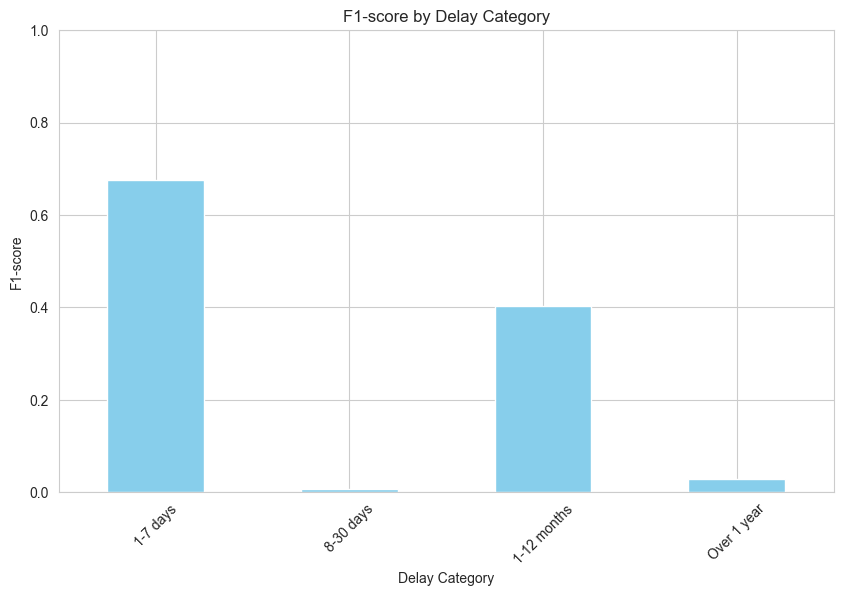

In [ ]:
# Get metrics as dict
report = classification_report(y_test, y_pred_log, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:-3, :3]  # exclude accuracy/avg rows

# setting order
desired_order = ['1-7 days', '8-30 days', '1-12 months', 'Over 1 year']

# reindex to enforce order
df_report = df_report.reindex(desired_order)

# plot F1-scores
df_report['f1-score'].plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('F1-score by Delay Category')
plt.ylabel('F1-score')
plt.xlabel('Delay Category')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

- Accuracy:52.8%, fairly low but still above random
- The model does well on common classes (1-7 days and 1-12 months) but less well on rarer classes (8-30 days and over 1 year)



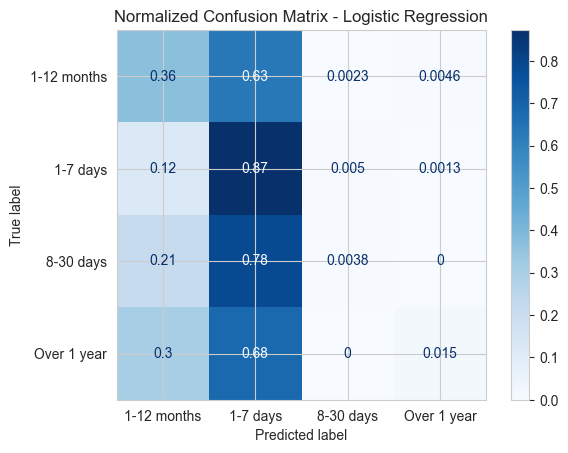

In [ ]:
# visualizing logistic regression with confusion matrix
ConfusionMatrixDisplay.from_estimator(
    log_reg_clf, 
    X_test, 
    y_test, 
    cmap='Blues',
    normalize='true'  # shows proportions instead of counts
)
plt.title("Normalized Confusion Matrix - Logistic Regression")
plt.show()

The confusion matrix shows the proportion of predictions for each true delay category. 
- Rows = actual delay category (True label)
- Columns = predicted category (Predicted label)
- Values = proportion of instances in that true category predicted as each class (sum of each row = 1).

Most Common Correct Predictions: 
- 1-12 months is predicted correctly about 36% of the time.
- 1-7 days is predicted correctly 87% of the time.

Struggles:
- 8-30 days rarely predicted correctly (.38%) and often misclassified as 1-7 days (78%) or 1-12 months (21%)
- Over 1 year is rarely predicted correctly (1.5%) and often misclassified as 1-7 days (68%) or 1-12 months (30%). 

Key Insights:
- Model is very strong at recognizing short delays (1-7 days), but struggles with longer delays.
- This suggests the model is biased toward predicting shorter or medium delays.

#### Studio Baseline

In [ ]:
delayed_reports['Delay_Category'].value_counts()

Delay_Category
1-7 days       3993
1-12 months    2166
8-30 days      1312
Over 1 year     652
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

Delay_Category
1-7 days       3194
1-12 months    1733
8-30 days      1049
Over 1 year     522
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Delay_Category
1-7 days       799
1-12 months    433
8-30 days      263
Over 1 year    130
Name: count, dtype: int64

In [ ]:
y_test.value_counts(normalize=True)

Delay_Category
1-7 days       0.491692
1-12 months    0.266462
8-30 days      0.161846
Over 1 year    0.080000
Name: proportion, dtype: float64

#### Key Findings

1. Perfect Stratification: The training and test sets have identical percentage distributions, confirming stratified sampling.

2. The majority class is '1-7 days' at 49.2%. This is lower than the F-1 accuracy of 53%.

3. Baseline Accuracy: Correctly Classifies 799 predictions and 826 incorrect predictioons in the test set. 

4. Nearly half of the reports are within 1-7 days. There are substantial delays within the 1 - 12 month range at 26.7%

5. Implications: When testing other models we will need to exceed 49.2% accuracy to be better than the baseline. There is also a class imbalance that we will need to look at further by using techniques like class weighting or oversampling minority classes

#### Ethical Concerns (bias, fairness, data representation)
- The logisitc regression model shows uneven performance across reporting delay categories, with the most common classes (1-12 months, 1-7 days) predicted relatively well, but rarer classes (8-30 days, 1 year) are often misclassified. 
    - This highlights potential data representation issues, as the model might reflect the imbalance in the dataset rather than underlying patterns.
- Low accuracy for certain groups could lead to fairness concerns, espescially if underrepresented delays correspond to specific victim demographics. 
- Data Representation Bias:
    - Underreporting: Sexual crimes have some of the highest underreporting rates, making our data inherently incomplete.
    - Demographic Gaps: Marginalized communities may be under represented due to distrust in lawenforcement.


**Mitigation Strategies**
1. Reweighting: Adjust the training data to give more weight to underrepresented categories to improve model learning for rarer classes.
2. Transparency: Document limitations, including class imbalance and associated risks, so stakeholders understand potential biases in predictions.
3. New Modeling: Explore algorithms that have fairness metrics that could reduce biased miclassification.
4. Purpose Limitation: Strictly limit model use to resource planning and support service allocation, never for individual case prioritization.

### Model Construction
---
We implemented 2 supervised machine learning models: a **Decision Tree Classifier** and a **Random Forest Classifier**.

Both models were built using a consistent preprocessing pipeline. Numerical features (e.g., Vict Age, TIME OCC, Hour, Year, Month) were passed through without scaling, while categorical features (e.g., Vict Sex, Vict Descent, Crm Cd Desc, Premis Desc, Time_Category) were one-hot encoded.

The dataset was split into training and test sets (80/20 split with stratification to preserve class distribution). Model performance was evaluated using accuracy, classification reports (precision, recall, F1-score), and confusion matrices to better understand class-specific errors.

In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'LOCATION', 'Vict Descent Full', 'Victim Age Group', 'Time_Formatted',
       'Hour', 'Time_Category', 'Year', 'Month', 'DayOfWeek',
       'Reporting_Delay', 'Delay_Category'],
      dtype='object')

In [ ]:
# target feature
target = "Delay_Category"

# features that we want to use for prediction
numeric_features = ["Vict Age", "TIME OCC", "Hour", "Year", "Month"]
categorical_features = [
    "DayOfWeek", "Vict Sex", "Vict Descent", "Victim Age Group", 
    "AREA NAME", "Premis Desc", "Crm Cd Desc", 
    "Weapon Desc", "Weapon Used Cd", "Status Desc", "Time_Category"
]

X = df[numeric_features + categorical_features]
y = df[target].astype(str)

print("Shape:", X.shape, y.shape)
X.head()

Shape: (8123, 16) (8123,)


,Vict Age,TIME OCC,Hour,Year,Month,DayOfWeek,Vict Sex,Vict Descent,Victim Age Group,AREA NAME,Premis Desc,Crm Cd Desc,Weapon Desc,Weapon Used Cd,Status Desc,Time_Category
70,49,100,1,2020,8,Thursday,M,O,Adults (25–49),Olympic,SINGLE FAMILY DWELLING,BATTERY WITH SEXUAL CONTACT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,Invest Cont,Night (0-6)
287,17,1,0,2020,2,Saturday,F,H,Adolescents (13–17),Mission,"VEHICLE, PASSENGER/TRUCK","RAPE, ATTEMPTED","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,Adult Other,Night (0-6)
455,8,1,0,2020,10,Thursday,F,H,Children (0–12),Mission,SINGLE FAMILY DWELLING,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,Invest Cont,Night (0-6)
524,19,1330,13,2020,5,Friday,F,H,Young Adults (18–24),Wilshire,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","RAPE, FORCIBLE","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,Invest Cont,Afternoon (12-18)
648,14,1900,19,2020,2,Sunday,F,H,Adolescents (13–17),Topanga,SINGLE FAMILY DWELLING,BATTERY WITH SEXUAL CONTACT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0,Adult Other,Evening (18-24)


We split the dataset 80/20 while preserving class distribution (`stratify=y`) to ensure each delay category is represented in both training and test sets.

In [ ]:
# train/test split before encoding
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (6498, 16)  Test size: (1625, 16)


### Pipeline: One-Hot Encoding -> Random Forest Classifier

---
Below we created a supervised machine learning model to create a Random Forest Classifer by using a preprocessing to model pipeline.

We used numerical feautres that were left untransoformed while the categorical features were one-hot encoded. 

The full preprocessing and model training steps were integrated using Scikit-learn’s Pipeline and ColumnTransformer utilities. The Random Forest classifier was configured with 300 trees (n_estimators=300), a minimum leaf size of 5 (min_samples_leaf=5), and balanced class weighting (class_weight="balanced_subsample").

In [ ]:
# preprocessing: one-hot encode categorical, passthrough numerics
ohe = OneHotEncoder(handle_unknown="ignore")
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", ohe, categorical_features),
    ]
)

In [ ]:
# define a random forest classifier pipeline
# random_state=42 for reproducibility
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=5,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

# pipeline
rf_pipe = Pipeline([
    ("prep", preprocess),
    ("clf", rf_clf)
])

# fit
rf_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Random Forest Evaluation

- The Random Forest achieves ~52% accuracy on the test set.  
- Macro F1 is 0.41, reflecting moderate performance across all classes.  
- The model performs best on the "1-7 days" class and struggles on longer delay categories.

In [ ]:
# evaluate the model on the training data
print("Train accuracy:", rf_pipe.score(X_train, y_train))
# evaluate the model on the test (hold out) data
print("Test accuracy:", rf_pipe.score(X_test, y_test))

labels_order = ["1-7 days", "8-30 days", "1-12 months", "Over 1 year"]

# printing detailed classification report
y_pred = rf_pipe.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=labels_order))

Train accuracy: 0.698522622345337
Test accuracy: 0.5218461538461538

Classification Report:
               precision    recall  f1-score   support

    1-7 days       0.64      0.74      0.68       799
   8-30 days       0.25      0.12      0.16       263
 1-12 months       0.43      0.39      0.41       433
 Over 1 year       0.31      0.47      0.38       130

    accuracy                           0.52      1625
   macro avg       0.41      0.43      0.41      1625
weighted avg       0.50      0.52      0.50      1625




Confusion Matrix (labels: ['1-7 days', '8-30 days', '1-12 months', 'Over 1 year'] )
 [[589  60 111  39]
 [133  31  74  25]
 [168  28 167  70]
 [ 31   3  35  61]]


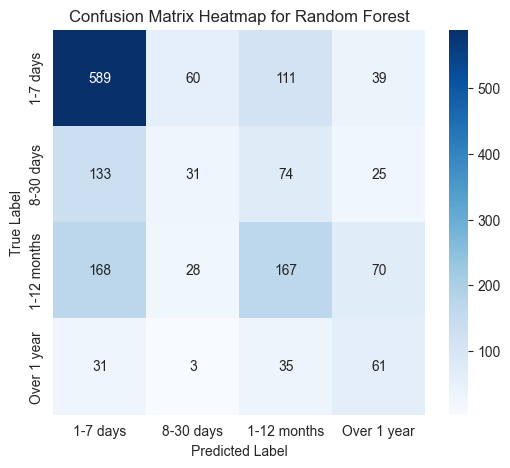

In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=labels_order)
print("\nConfusion Matrix (labels:", labels_order, ")\n", cm)

# Confusion matrix (visual heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_order, yticklabels=labels_order)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Random Forest")
plt.show()

#### Random Forest Feature Importances

---
After training the Random Forest Classifier, we evaluated which features contributed the most significantly to the model's predictions using feature importance scores.

Through this process we found that had the highest influence on classification performance were Vict Age (0.1216), TIME OCC (0.0773), and Month (0.0749).


In [ ]:
# numeric names are unchanged
num_names = numeric_features

# one-hot encoded names
cat_names = rf_pipe.named_steps["prep"].named_transformers_["cat"].get_feature_names_out(categorical_features)

# combine
feature_names = np.array(num_names + list(cat_names))

# get importances
rf_importances = rf_pipe.named_steps["clf"].feature_importances_

# sort
order = np.argsort(rf_importances)[::-1]

# show top features
top_k = 25
for i in order[:top_k]:
    print(f"{feature_names[i]:40s}  {rf_importances[i]:.4f}")

Vict Age                                  0.1216
TIME OCC                                  0.0773
Month                                     0.0749
Hour                                      0.0661
Year                                      0.0641
Premis Desc_SINGLE FAMILY DWELLING        0.0295
Victim Age Group_Children (0–12)          0.0274
Victim Age Group_Adolescents (13–17)      0.0250
Victim Age Group_Adults (25–49)           0.0229
Vict Descent_H                            0.0166
Status Desc_Invest Cont                   0.0163
Crm Cd Desc_SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ  0.0161
Time_Category_Morning (6-12)              0.0157
Crm Cd Desc_BATTERY WITH SEXUAL CONTACT   0.0157
Crm Cd Desc_RAPE, FORCIBLE                0.0156
Time_Category_Evening (18-24)             0.0143
Status Desc_Adult Other                   0.0135
Premis Desc_MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  0.0132
Vict Descent_W                            0.0130
Vict Descent_B           

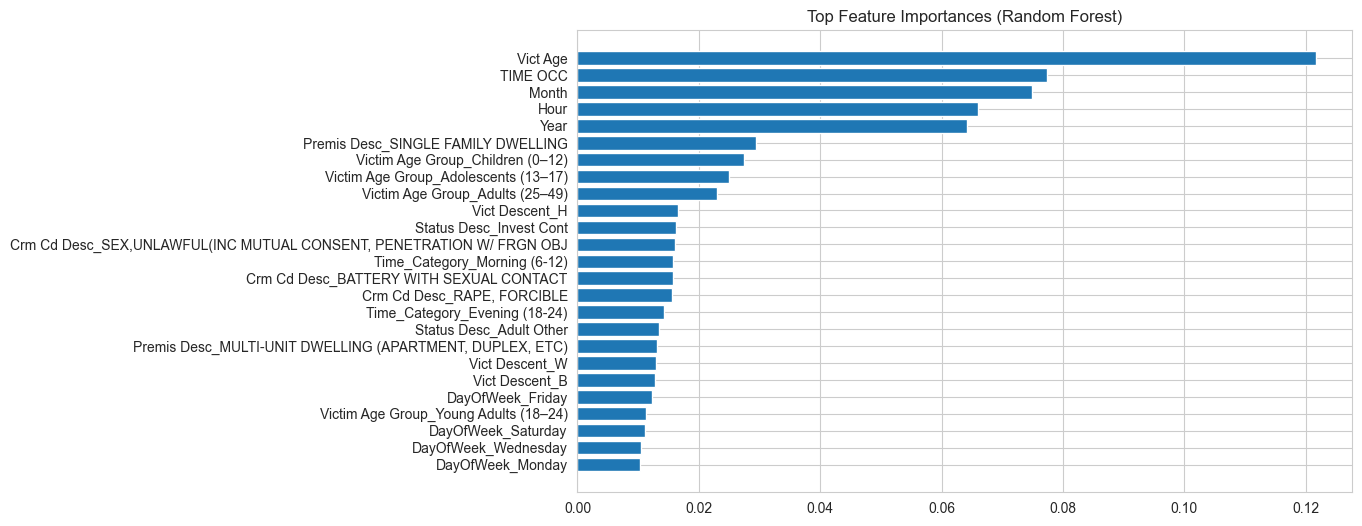

In [ ]:
# plot
plt.figure(figsize=(10,6))
plt.barh(feature_names[order[:top_k]], rf_importances[order[:top_k]])
plt.gca().invert_yaxis()
plt.title("Top Feature Importances (Random Forest)")
plt.show()

#### Pipeline: One-Hot Encoding -> Decision Tree

---
Moving onto our second supervised machine learning model, a Decision Tree Classifier.

Numeric features like Vict Age, TIME OCC, and Month were kept as-is, while categorical features like Vict Sex and Crm Cd Desc were one-hot encoded to turn them into numbers the model can understand. 

The decision tree was set to a max depth of 5 and required at least 50 samples per leaf to help prevent overfitting. Balanced class weights were also used to account for any class imbalance. 

The preprocessing steps and the model were integrated into a single pipeline, allowing for the entire workflow to be trained in one step. 

In [ ]:
# creating a pipeline using Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=50,
    class_weight="balanced"
)

tree_pipe = Pipeline([("prep", preprocess), ("clf", tree_clf)])

tree_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Decision Tree Evaluation

- The Decision Tree achieves ~45% accuracy on the test set and macro F1 of 0.36.  
- It underperforms the Random Forest but provides interpretable feature splits.

In [ ]:
print("Train accuracy:", tree_pipe.score(X_train, y_train))
print("Test  accuracy:", tree_pipe.score(X_test, y_test))

labels_order = ["1-7 days", "8-30 days", "1-12 months", "Over 1 year"]

# printing detailed classification report
y_pred = tree_pipe.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=labels_order))

Train accuracy: 0.4656817482302247
Test  accuracy: 0.45046153846153847

Classification Report:
               precision    recall  f1-score   support

    1-7 days       0.63      0.62      0.62       799
   8-30 days       0.14      0.10      0.12       263
 1-12 months       0.42      0.33      0.37       433
 Over 1 year       0.22      0.52      0.31       130

    accuracy                           0.45      1625
   macro avg       0.35      0.39      0.36      1625
weighted avg       0.46      0.45      0.45      1625




Confusion Matrix (labels: ['1-7 days', '8-30 days', '1-12 months', 'Over 1 year'] )
 [[492 109 107  91]
 [116  27  74  46]
 [143  46 145  99]
 [ 26  16  20  68]]


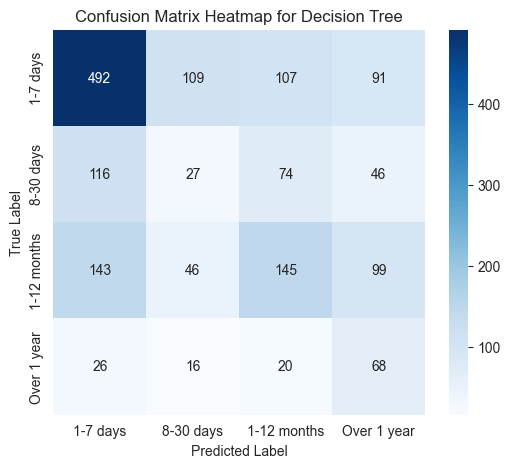

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=labels_order)
print("\nConfusion Matrix (labels:", labels_order, ")\n", cm)

# Confusion matrix (visual heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_order, yticklabels=labels_order)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap for Decision Tree")
plt.show()

In [ ]:
num_names = numeric_features
cat_names = tree_pipe.named_steps["prep"].named_transformers_["cat"].get_feature_names_out(categorical_features)
feature_names = np.array(num_names + list(cat_names))

tree_importances = tree_pipe.named_steps["clf"].feature_importances_

order = np.argsort(tree_importances)[::-1]

top_k = 25
for i in order[:top_k]:
    print(f"{feature_names[i]:40s}  {tree_importances[i]:.4f}")

Vict Age                                  0.3970
Year                                      0.1834
Month                                     0.1393
TIME OCC                                  0.1200
Crm Cd Desc_SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ  0.0500
Premis Desc_SINGLE FAMILY DWELLING        0.0324
Victim Age Group_Adolescents (13–17)      0.0299
Time_Category_Morning (6-12)              0.0204
Weapon Used Cd_400.0                      0.0197
Crm Cd Desc_BATTERY WITH SEXUAL CONTACT   0.0078
Status Desc_Juv Other                     0.0000
Status Desc_Juv Arrest                    0.0000
Vict Descent_B                            0.0000
AREA NAME_Hollenbeck                      0.0000
AREA NAME_Harbor                          0.0000
AREA NAME_Foothill                        0.0000
AREA NAME_Devonshire                      0.0000
AREA NAME_Central                         0.0000
AREA NAME_77th Street                     0.0000
Victim Age Group_nan                     

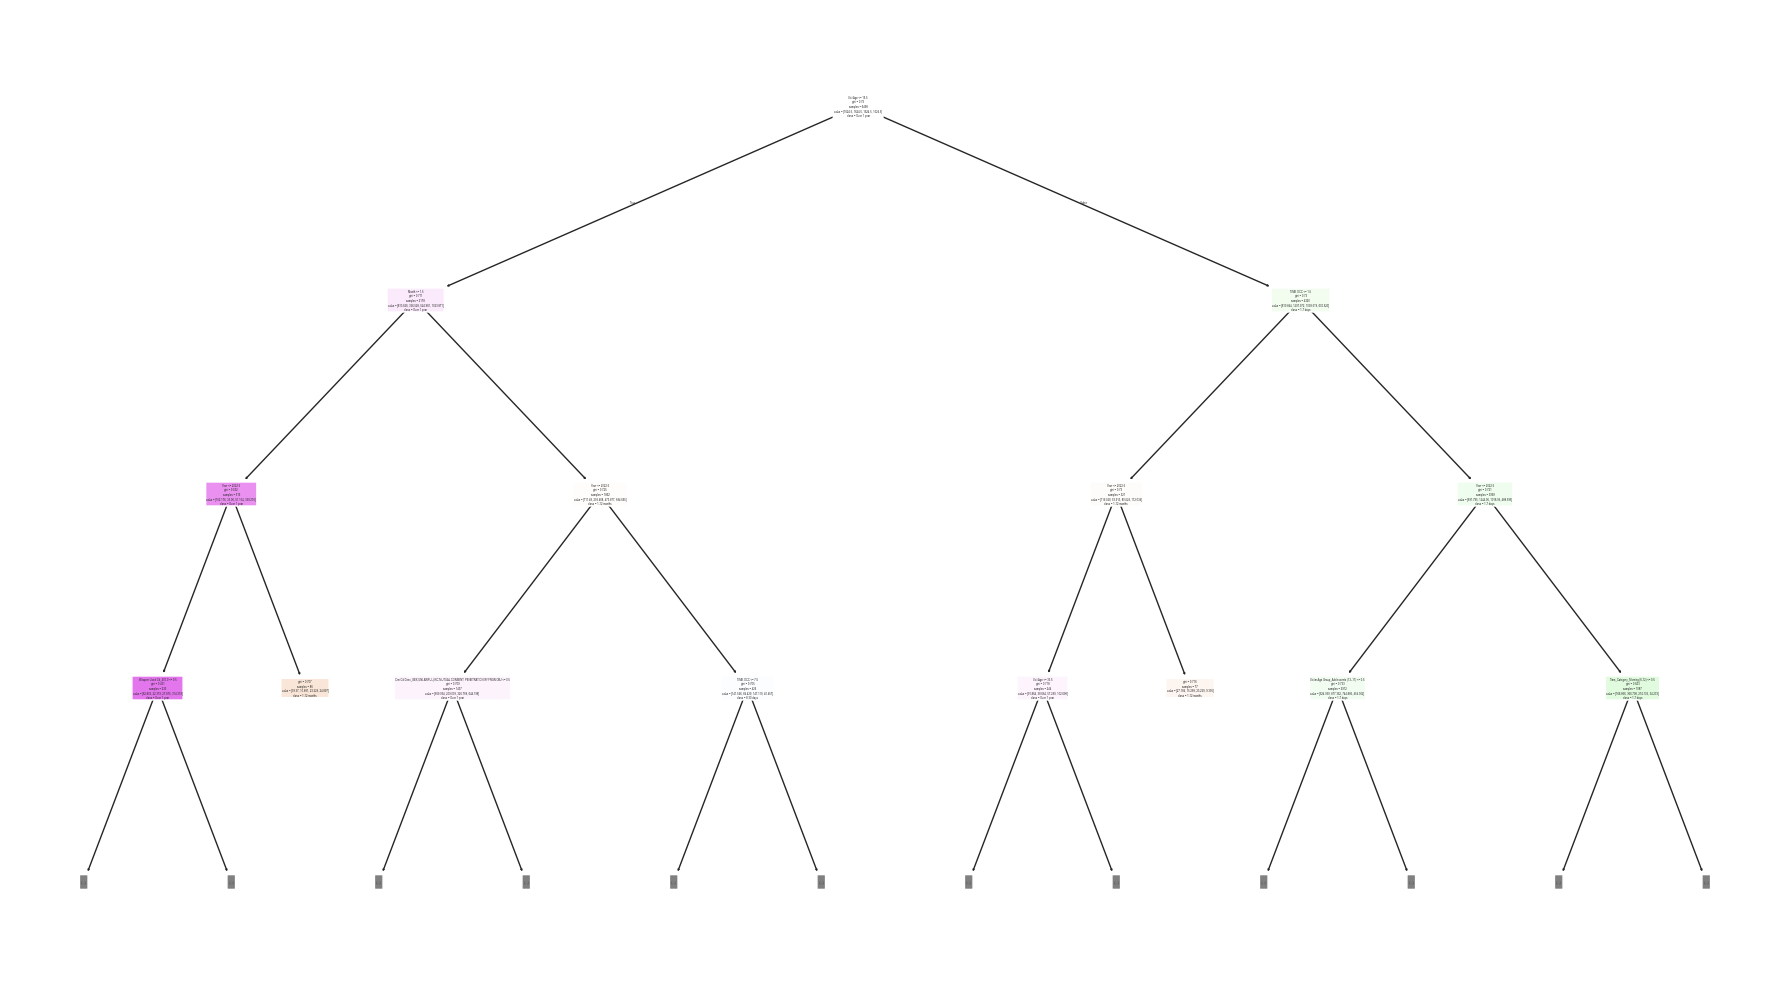

In [ ]:
# plot the top of the tree
from sklearn import tree as sktree

plt.figure(figsize=(18, 10))
sktree.plot_tree(
    tree_pipe.named_steps['clf'],
    feature_names=feature_names,
    class_names=sorted(y.unique()),
    max_depth=3,
    filled=True,
    rounded=True
)
plt.tight_layout()
plt.show()

#### Comparison of Important Features: Decision Tree vs Random Forest
---
Comparing feature importance between Decision Tree and Random Forest, we see consistency in the top predictors (Vict Age, TIME OCC, Month), though Random Forest distributes importance more evenly across features. Additionally, Vict Age is much more significant in the Decision Tree.

In [ ]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': tree_importances,
    'Random Forest': rf_importances
})
importance_df = importance_df.sort_values(by='Random Forest', ascending=False)
importance_df.head(25)

,Feature,Decision Tree,Random Forest
0,Vict Age,0.397009,0.121604
1,TIME OCC,0.120004,0.077313
4,Month,0.139314,0.074875
2,Hour,0.000000,0.066068
3,Year,0.183388,0.064127
149,Premis Desc_SINGLE FAMILY DWELLING,0.032442,0.029461
21,Victim Age Group_Children (0–12),0.000000,0.027378
19,Victim Age Group_Adolescents (13–17),0.029872,0.024955
20,Victim Age Group_Adults (25–49),0.000000,0.022935
16,Vict Descent_H,0.000000,0.016627


### Hyperparameter Tuning
---
We performed hyperparameter tuning using GridSearchCV with 5-fold cross-validation.  
F1-macro was chosen as the scoring metric to account for class imbalance.

We selected four supervised models suitable for our dataset with numeric and categorical features and imbalanced classes: 
- **Decision Tree**: interpretable, handles non-linear splits
- **Random Forest**: ensemble for higher accuracy, reduces overfitting
- **Gradient Boosting**: ensemble boosting for improved predictive power
- **KNN**: distance-based method for comparison


#### GridSearchCV
The table below compares the performance of four machine learning models after hyperparameter tuning, evaluated using both cross-validated F1-macro (`cv_f1_macro`) and test set metrics (`test_accuracy` and `test_f1_macro`).

**Key Observations:**
- **Random Forest** achieved the highest test F1-macro (0.392), indicating it performs best at balancing performance across all delay categories. Its test accuracy is 55%, reflecting moderate overall prediction performance.  
- **Decision Tree** shows slightly lower performance (test F1-macro 0.391, accuracy 52%), but it remains interpretable and highlights important features such as Victim Age and Time of Occurrence.  
- **K-Nearest Neighbors (KNN)** performs reasonably well (test F1-macro 0.380) but slightly underperforms compared to the tree-based models.  
- **Gradient Boosting** achieved the highest test accuracy (0.559), but its test F1-macro is lower (0.371), suggesting it predicts the most frequent classes well but struggles with minority classes.  

**Interpretation:**

- Tree-based ensemble methods (Random Forest and Gradient Boosting) generally outperform simpler models like Decision Tree and KNN in this dataset.  
- For predicting reporting delay categories, Random Forest is the strongest candidate due to its balanced performance across all classes and robustness to feature interactions.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [ ]:
#   - Builds a pipeline: preprocessing (preprocess) + classifier (estimator)
#   - Runs GridSearchCV with the given parameter grid and 5-fold CV, scoring by F1-macro
#   - Fits the tuned model on the training data
#   - Predicts labels on the test set
#   - Returns a dictionary with: model name, best hyperparameters found, best cross-validation F1 score, test accuracy, test F1-macro, the trained best estimator itself
def tune_and_eval(model_name, estimator, param_grid, X_train, y_train, X_test, y_test):
    pipe = Pipeline([("prep", preprocess), ("clf", estimator)])
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring="f1_macro",
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)
    best = grid.best_estimator_
    y_pred = best.predict(X_test)
    return {
        "model": model_name,
        "best_params": grid.best_params_
        ,
        "cv_f1_macro": grid.best_score_,
        "test_accuracy": accuracy_score(y_test, y_pred),
        "test_f1_macro": f1_score(y_test, y_pred, average="macro"),
        "estimator": best
    }

results = []

# Decision Tree
results.append(tune_and_eval(
    "DecisionTree",
    DecisionTreeClassifier(random_state=42),
    {
        "clf__criterion": ["gini", "entropy"],
        "clf__max_depth": [3, 5, 8, None],
        "clf__min_samples_leaf": [1, 10, 50],
        "clf__class_weight": [None, "balanced"],
    },
    X_train, y_train, X_test, y_test
))

# Random Forest
results.append(tune_and_eval(
    "RandomForest",
    RandomForestClassifier(random_state=42, n_jobs=-1),
    {
        "clf__n_estimators": [300],
        "clf__max_depth": [None, 8, 16],
        "clf__min_samples_leaf": [1, 10, 50],
        "clf__class_weight": [None, "balanced_subsample"],
    },
    X_train, y_train, X_test, y_test
))

# Gradient Boosting
results.append(tune_and_eval(
    "GradientBoosting",
    GradientBoostingClassifier(random_state=42),
    {
        "clf__n_estimators": [100, 300],
        "clf__learning_rate": [0.05, 0.1],
        "clf__max_depth": [2, 3],
        "clf__min_samples_leaf": [1, 10, 50],
    },
    X_train, y_train, X_test, y_test
))

# K-Nearest Neighbors (KNN)
results.append(tune_and_eval(
    "KNN",
    KNeighborsClassifier(),
    {
        "clf__n_neighbors": [3, 5, 11],    
        "clf__weights": ["uniform", "distance"], 
        "clf__p": [1, 2],
    },
    X_train, y_train, X_test, y_test
))


# Build summary DataFrame
results_df = pd.DataFrame([
    {k: v for k, v in r.items() if k not in ("estimator", "best_params")}
    for r in results
]).sort_values(by="test_f1_macro", ascending=False).reset_index(drop=True)

results_df

KeyboardInterrupt: 


Fairness Disparity Plots

In [ ]:
X_demo = df[['Vict Age', 'Vict Sex', 'Vict Descent', 'AREA NAME']].copy()

X_demo['Vict Age Group'] = pd.cut(
    X_demo['Vict Age'], 
    bins=[0, 12, 17, 24, 49, 120],
    labels=['Children_0_12', 'Adolescents_13_17', 'Young_Adults_18_24', 
            'Adults_25_49', 'Older_Adults_50_plus']
)

descent_map = {'H': 'Hispanic', 'W': 'White', 'B': 'Black', 'O': 'Other', 'A': 'Asian'}
X_demo['Vict Descent Full'] = X_demo['Vict Descent'].map(descent_map)

X_demo = X_demo[['Vict Age Group', 'Vict Sex', 'Vict Descent Full', 'AREA NAME']]
y_demo = df['Delay_Category']

demographic_features = ['Vict Age Group', 'Vict Sex', 'Vict Descent Full', 'AREA NAME']

demo_preprocessor = ColumnTransformer(
    transformers=[
        ('demo', OneHotEncoder(drop='first', handle_unknown='ignore'), demographic_features)
    ],
    remainder='drop'
)

dt_pipeline = Pipeline([
    ('preprocessor', demo_preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=20,
        class_weight='balanced',
        random_state=42
    ))
])

dt_pipeline.fit(X_demo, y_demo)
y_pred_dt = dt_pipeline.predict(X_demo)

print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_demo, y_pred_dt):.3f}")
print("\nClassification Report:")
print(classification_report(y_demo, y_pred_dt))

dt_model = dt_pipeline.named_steps['model']
preprocessor = dt_pipeline.named_steps['preprocessor']

feature_names = preprocessor.named_transformers_['demo'].get_feature_names_out(demographic_features)

feature_importance_dt = pd.DataFrame({
    'feature': feature_names,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nDemographic Feature Importance (At-Risk Groups):")
for idx, row in feature_importance_dt.head(15).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")



In [ ]:
rf_pipeline = Pipeline([
    ('preprocessor', demo_preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_leaf=20,
        class_weight='balanced',
        random_state=42
    ))
])

rf_pipeline.fit(X_demo, y_demo)
y_pred_rf = rf_pipeline.predict(X_demo)

print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_demo, y_pred_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_demo, y_pred_rf))

# Extract Random Forest feature importance
rf_model = rf_pipeline.named_steps['model']
feature_importance_rf = pd.DataFrame({
    'feature': feature_names,  # Using the same feature_names from Decision Tree code
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRandom Forest Feature Importance (At-Risk Groups):")
for idx, row in feature_importance_rf.head(15).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

Random Forest:
Accuracy: 0.480

Classification Report:
              precision    recall  f1-score   support

 1-12 months       0.42      0.36      0.39      2166
    1-7 days       0.62      0.68      0.65      3993
   8-30 days       0.23      0.11      0.15      1312
 Over 1 year       0.21      0.40      0.28       652

    accuracy                           0.48      8123
   macro avg       0.37      0.39      0.37      8123
weighted avg       0.47      0.48      0.47      8123


Random Forest Feature Importance (At-Risk Groups):
Vict Age Group_Adults_25_49: 0.2312
Vict Age Group_Children_0_12: 0.2264
Vict Age Group_Young_Adults_18_24: 0.0922
Vict Age Group_Older_Adults_50_plus: 0.0658
Vict Descent Full_Hispanic: 0.0519
AREA NAME_Central: 0.0329
Vict Descent Full_Black: 0.0270
Vict Descent Full_White: 0.0233
AREA NAME_Foothill: 0.0191
AREA NAME_West Valley: 0.0190
Vict Sex_M: 0.0186
Vict Descent Full_Other: 0.0157
AREA NAME_Mission: 0.0147
AREA NAME_Hollywood: 0.0147
AREA NAME_N 

#### SVC 

- Looked at because we did in the previous model exploration and wanted to see how it behaved with these features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('preprocessor', demo_preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # SVC needs scaling
    ('model', SVC(
        kernel='linear',  # Use linear for interpretable coefficients
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    ))
])

svc_pipeline.fit(X_demo, y_demo)
y_pred_svc = svc_pipeline.predict(X_demo)

print("SVC:")
print(f"Accuracy: {accuracy_score(y_demo, y_pred_svc):.3f}")
print("\nClassification Report:")
print(classification_report(y_demo, y_pred_svc))

svc_model = svc_pipeline.named_steps['model']

if hasattr(svc_model.coef_, 'toarray'):
    coef_dense = svc_model.coef_.toarray()
else:
    coef_dense = svc_model.coef_

if len(svc_model.classes_) > 2:
    coefficients = np.mean(np.abs(coef_dense), axis=0)
else:
    coefficients = np.abs(coef_dense[0])

feature_importance_svc = pd.DataFrame({
    'feature': feature_names,
    'importance': coefficients
}).sort_values('importance', ascending=False)

print("\nSVC Feature Importance (At-Risk Groups - Linear Kernel Coefficients):")
for idx, row in feature_importance_svc.head(15).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

c:\Users\kayle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC:
Accuracy: 0.195

Classification Report:
              precision    recall  f1-score   support

 1-12 months       0.25      0.10      0.14      2166
    1-7 days       0.56      0.14      0.22      3993
   8-30 days       0.16      0.36      0.22      1312
 Over 1 year       0.10      0.52      0.17       652

    accuracy                           0.20      8123
   macro avg       0.27      0.28      0.19      8123
weighted avg       0.38      0.20      0.20      8123


SVC Feature Importance (At-Risk Groups - Linear Kernel Coefficients):
Vict Descent Full_Black: 0.3051
Vict Descent Full_Hispanic: 0.2349
Vict Descent Full_White: 0.2280
Vict Age Group_Older_Adults_50_plus: 0.2029
Vict Sex_M: 0.1911
Vict Age Group_Adults_25_49: 0.1761
Vict Descent Full_Other: 0.1512
Vict Age Group_Young_Adults_18_24: 0.1251
AREA NAME_Devonshire: 0.1153
AREA NAME_N Hollywood: 0.0814
Vict Age Group_Children_0_12: 0.0608
AREA NAME_Olympic: 0.0574
AREA NAME_Rampart: 0.0549
AREA NAME_West LA: 0.0539
Vic

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_demo_encoded = label_encoder.fit_transform(y_demo)

print("Label mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {i} -> {class_name}")

xgb_pipeline = Pipeline([
    ('preprocessor', demo_preprocessor),
    ('model', XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])

xgb_pipeline.fit(X_demo, y_demo_encoded)
y_pred_xgb_encoded = xgb_pipeline.predict(X_demo)

y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

print("XGBOOST:")
print(f"Accuracy: {accuracy_score(y_demo, y_pred_xgb):.3f}")
print("\nClassification Report:")
print(classification_report(y_demo, y_pred_xgb))

xgb_model = xgb_pipeline.named_steps['model']
feature_importance_xgb = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nXGBoost Feature Importance (At-Risk Groups):")
for idx, row in feature_importance_xgb.head(15).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

Label mapping:
  0 -> 1-12 months
  1 -> 1-7 days
  2 -> 8-30 days
  3 -> Over 1 year
XGBOOST:
Accuracy: 0.552

Classification Report:
              precision    recall  f1-score   support

 1-12 months       0.45      0.47      0.46      2166
    1-7 days       0.60      0.85      0.70      3993
   8-30 days       0.57      0.02      0.04      1312
 Over 1 year       0.45      0.10      0.16       652

    accuracy                           0.55      8123
   macro avg       0.52      0.36      0.34      8123
weighted avg       0.54      0.55      0.48      8123


XGBoost Feature Importance (At-Risk Groups):
Vict Age Group_Adults_25_49: 0.0767
Vict Age Group_Older_Adults_50_plus: 0.0711
Vict Age Group_Young_Adults_18_24: 0.0654
Vict Age Group_Children_0_12: 0.0617
AREA NAME_Central: 0.0448
Vict Age Group_nan: 0.0393
AREA NAME_Devonshire: 0.0358
AREA NAME_Van Nuys: 0.0344
AREA NAME_Northeast: 0.0326
AREA NAME_Topanga: 0.0307
AREA NAME_West Valley: 0.0307
AREA NAME_Wilshire: 0.0293
AREA 

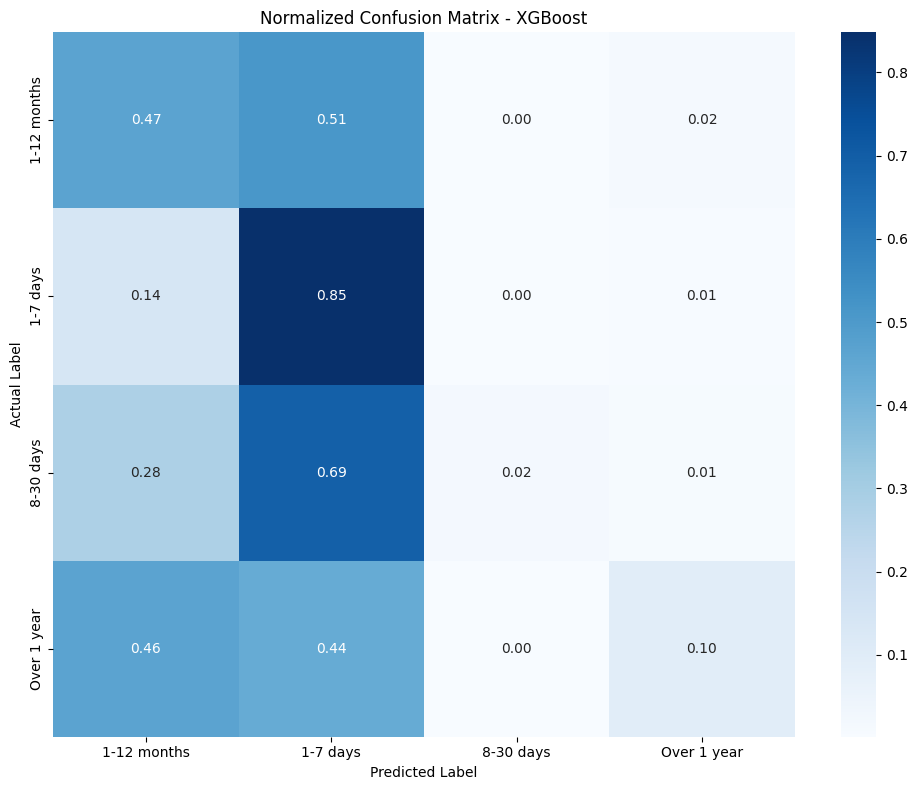

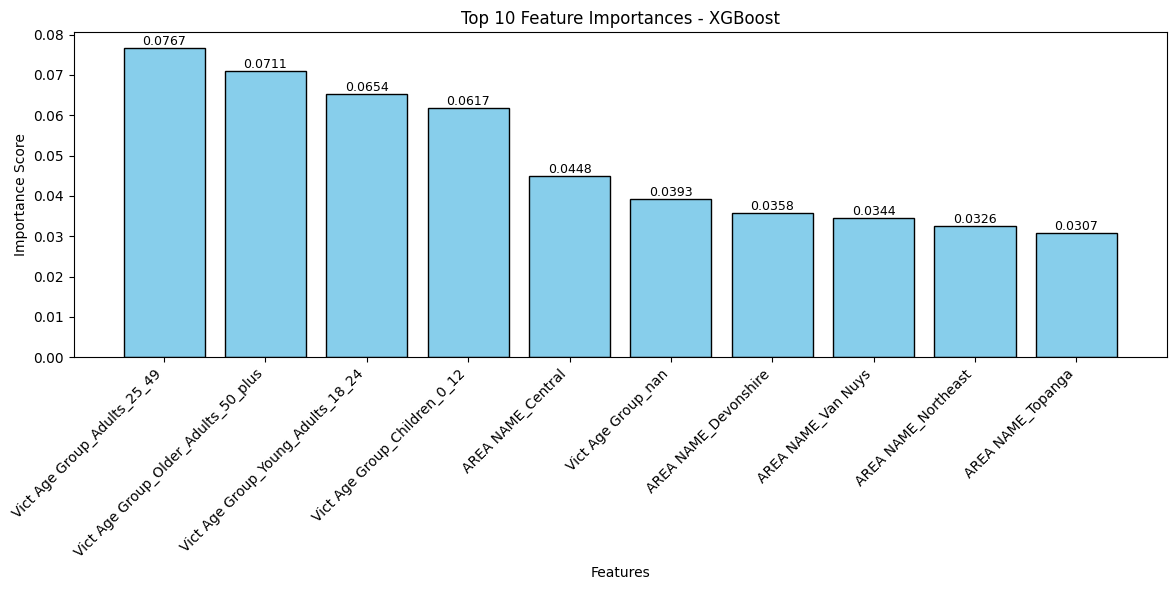

In [ ]:
plt.style.use('default')
sns.set_palette("husl")

cm = confusion_matrix(y_demo, y_pred_xgb)
class_names = label_encoder.classes_
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix - XGBoost')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

top_10_features = feature_importance_xgb.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_10_features)), top_10_features['importance'], 
               color='skyblue', edgecolor='black')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Feature Importances - XGBoost')
plt.xticks(range(len(top_10_features)), top_10_features['feature'], rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



#### Model Comparison

In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

detailed_comparison = []

for model_name, y_pred in [
    ('Decision Tree', y_pred_dt),
    ('Random Forest', y_pred_rf),
    ('SVC', y_pred_svc),
    ('XGBoost', y_pred_xgb)
]:
    accuracy = accuracy_score(y_demo, y_pred)
    f1_macro = f1_score(y_demo, y_pred, average='macro')
    precision_macro = precision_score(y_demo, y_pred, average='macro')
    recall_macro = recall_score(y_demo, y_pred, average='macro')
    
    detailed_comparison.append({
        'Model': model_name,
        'Accuracy': f"{accuracy:.4f}",
        'F1_Macro': f"{f1_macro:.4f}",
        'Precision_Macro': f"{precision_macro:.4f}",
        'Recall_Macro': f"{recall_macro:.4f}"
    })

detailed_df = pd.DataFrame(detailed_comparison)
detailed_df = detailed_df.sort_values('F1_Macro', ascending=False).reset_index(drop=True)

print("Model Comparison")
print(detailed_df.to_string(index=False))

Model Comparison
        Model Accuracy F1_Macro Precision_Macro Recall_Macro
Random Forest   0.4796   0.3661          0.3697       0.3890
Decision Tree   0.4652   0.3574          0.3575       0.3764
      XGBoost   0.5518   0.3371          0.5152       0.3569
          SVC   0.1952   0.1902          0.2694       0.2813


Fairness Bias

In [ ]:
def calculate_fairness_metrics(model, X_test, y_test, protected_attribute, protected_values):
    metrics = {}
    y_pred = model.predict(X_test)
    
    # Convert predictions back to original labels for XGBoost
    if hasattr(model, 'named_steps') and 'model' in model.named_steps:
        if hasattr(model.named_steps['model'], 'feature_importances_'):  # Likely XGBoost
            if hasattr(label_encoder, 'inverse_transform'):
                y_pred = label_encoder.inverse_transform(y_pred)
    
    for value in protected_values:
        mask = (X_test[protected_attribute] == value)
        if mask.sum() == 0:
            continue
            
        y_true_group = y_test[mask]
        y_pred_group = y_pred[mask]
        
        metrics[value] = {
            'accuracy': accuracy_score(y_true_group, y_pred_group),
            'precision_macro': precision_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'recall_macro': recall_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'f1_macro': f1_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'size': len(y_true_group)
        }
    
    return metrics

ANALYZING FAIRNESS BY: Vict Sex
Protected groups: ['M', 'F']

Analyzing Decision Tree


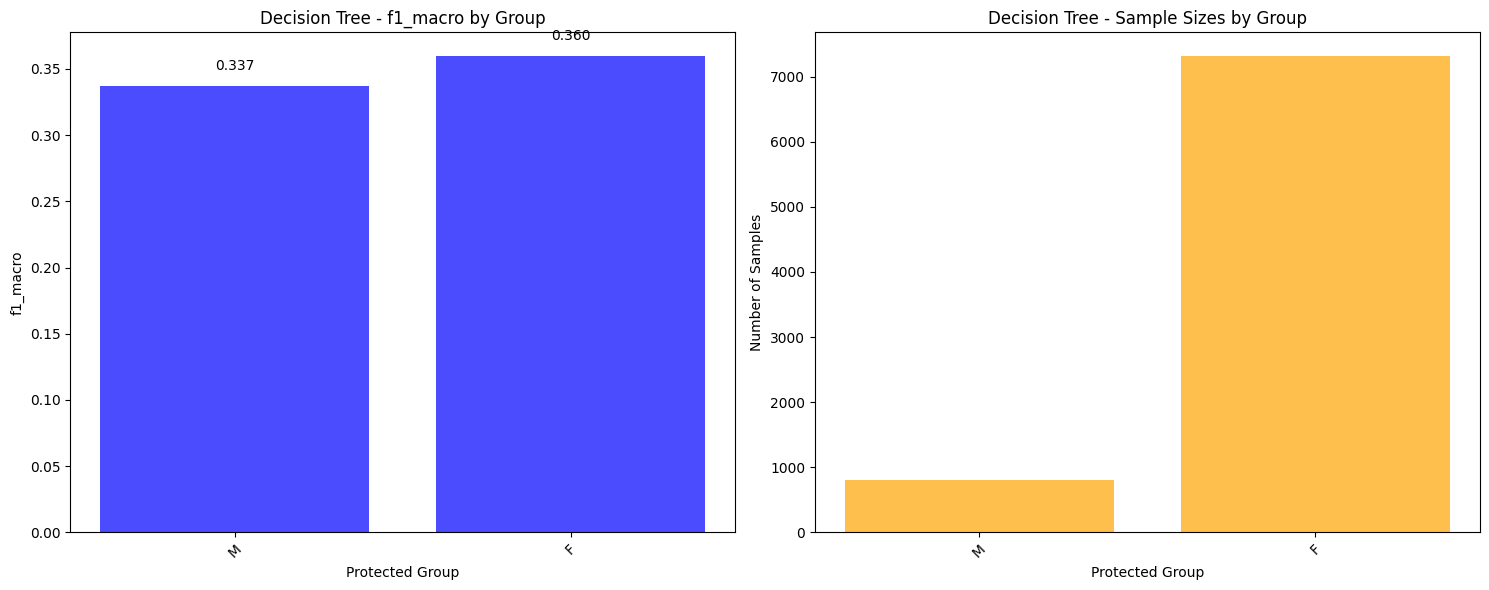


Decision Tree - f1_macro Disparities Using the Absolute Difference from Mean:
M: 0.0113
F: 0.0113

Analyzing Random Forest


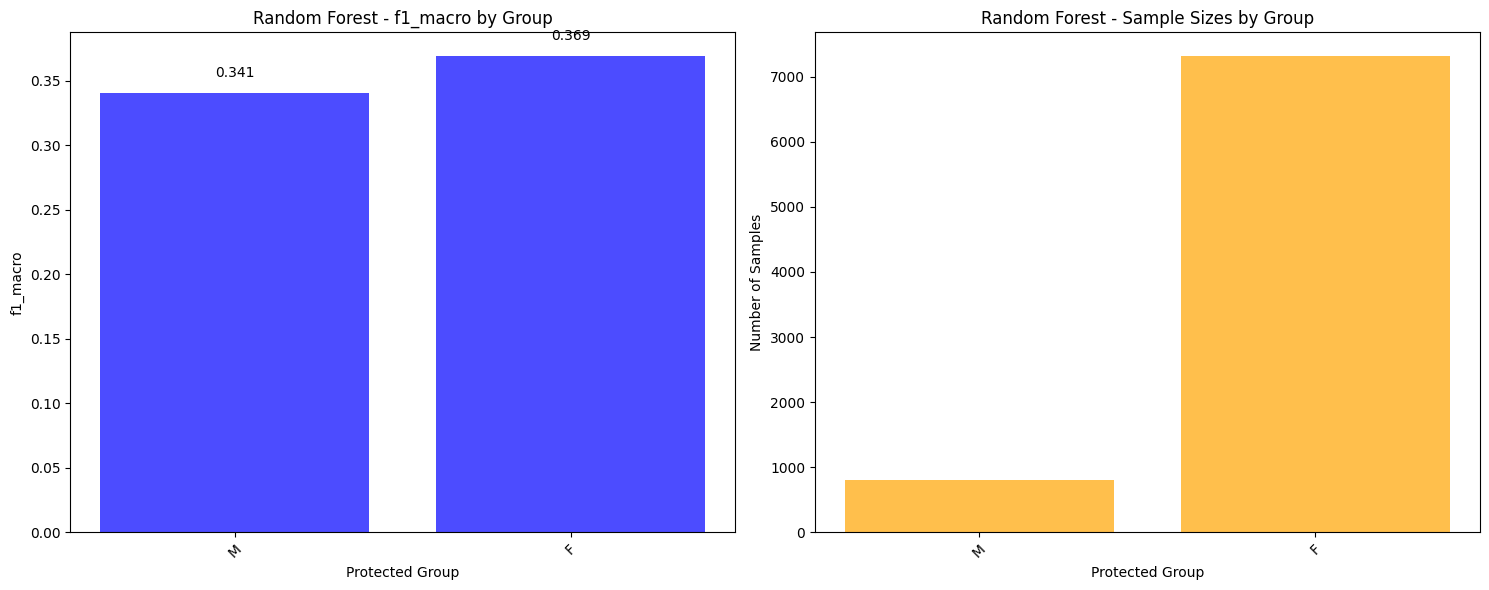


Random Forest - f1_macro Disparities Using the Absolute Difference from Mean:
M: 0.0142
F: 0.0142

Analyzing SVC


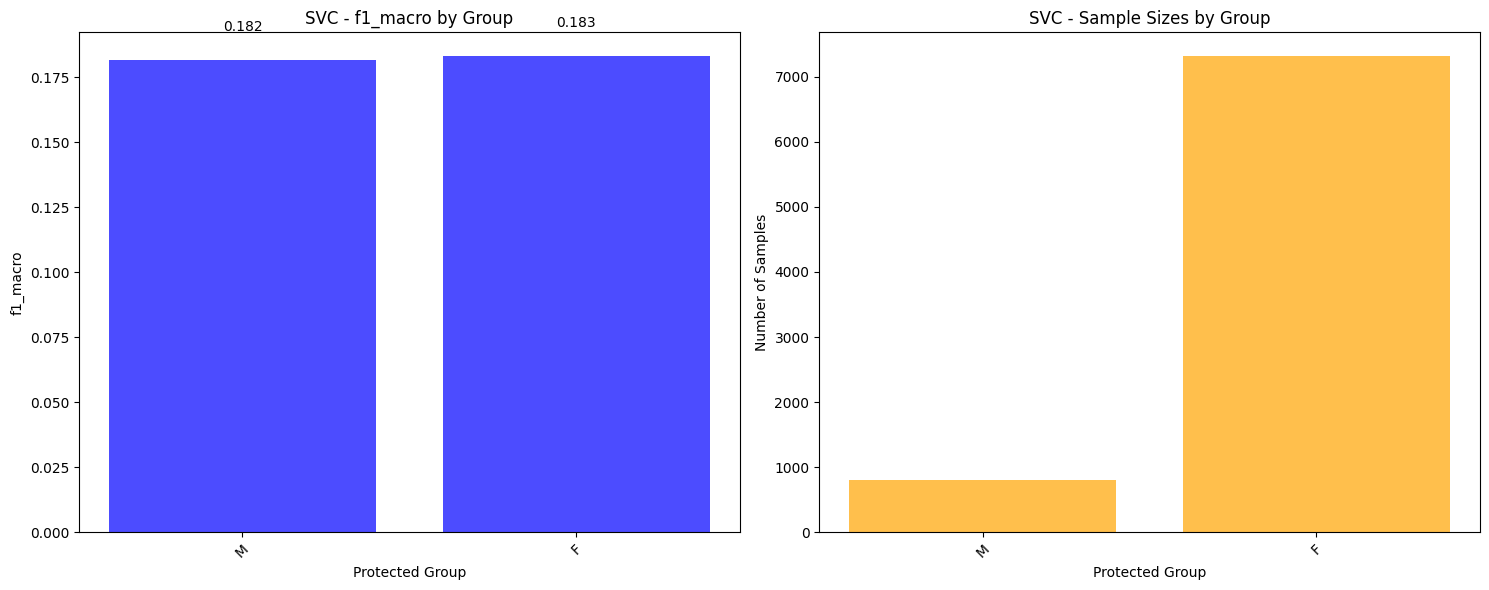


SVC - f1_macro Disparities Using the Absolute Difference from Mean:
M: 0.0007
F: 0.0007

Analyzing XGBoost
Error analyzing XGBoost: Mix of label input types (string and number)
ANALYZING FAIRNESS BY: Vict Descent Full
Protected groups: ['Other', 'Hispanic', 'White', 'Asian', 'Black']

Analyzing Decision Tree


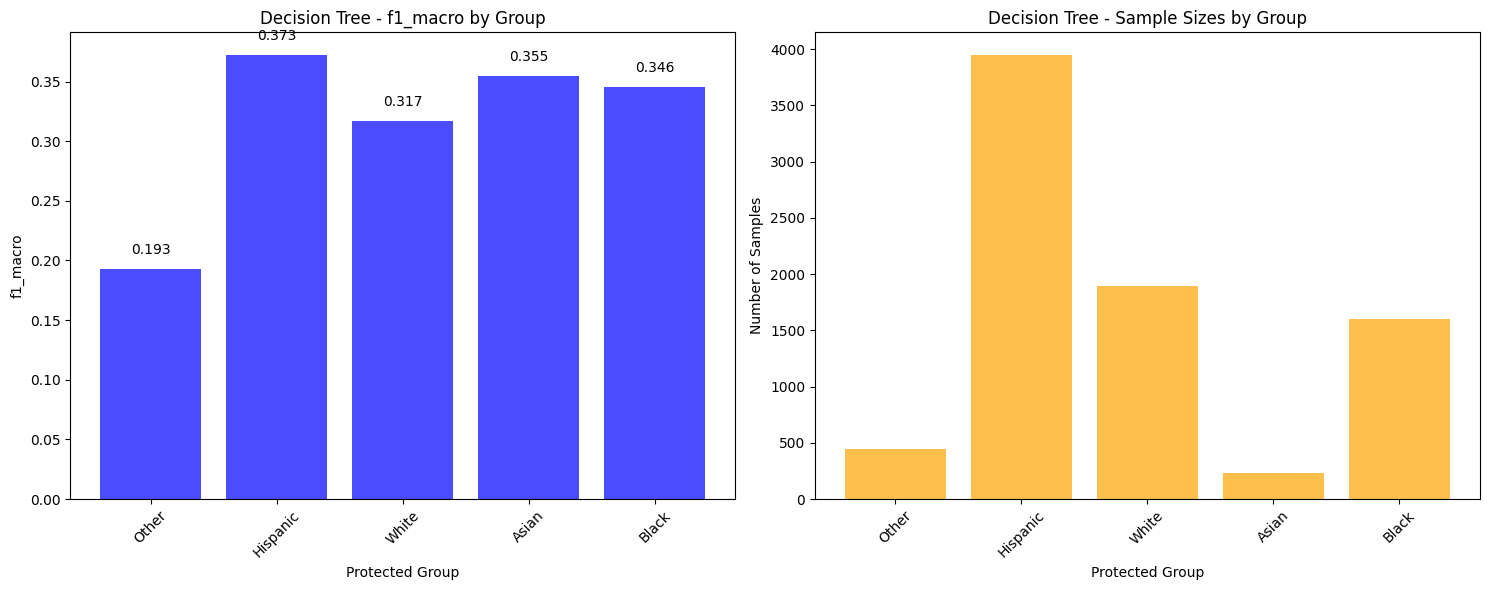


Decision Tree - f1_macro Disparities Using the Absolute Difference from Mean:
Other: 0.1235
Hispanic: 0.0561
White: 0.0005
Asian: 0.0379
Black: 0.0290

Analyzing Random Forest


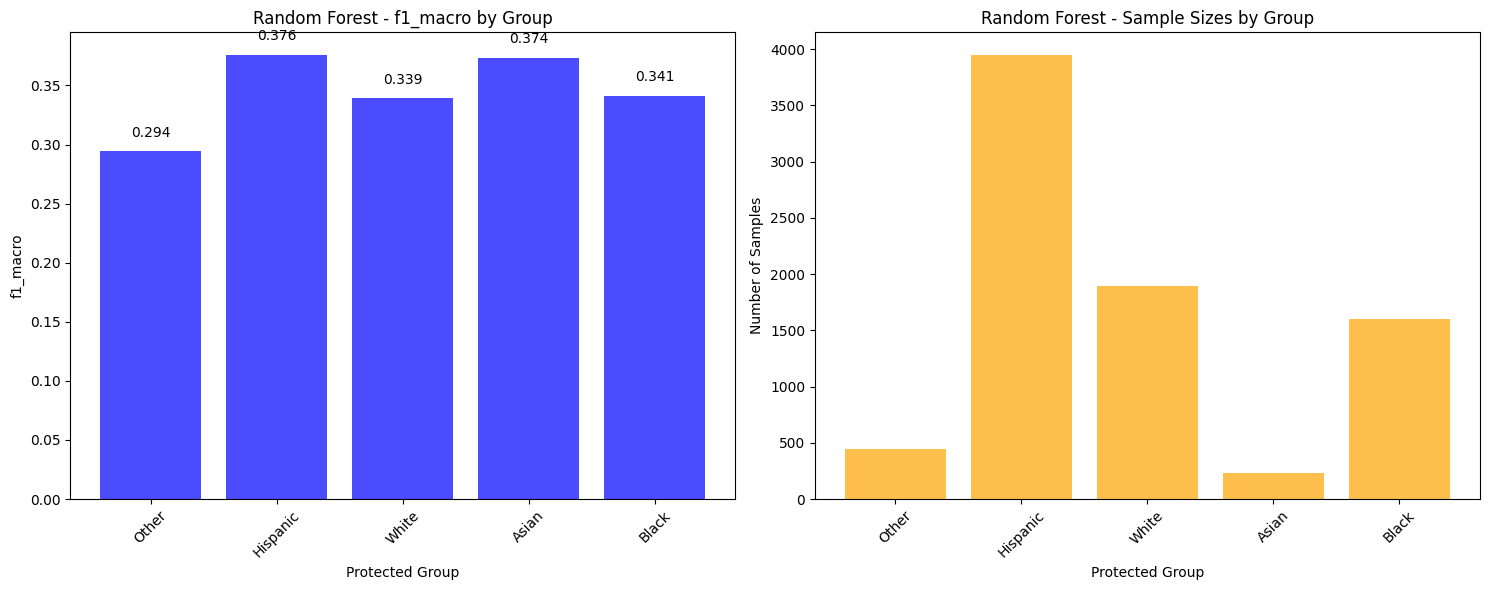


Random Forest - f1_macro Disparities Using the Absolute Difference from Mean:
Other: 0.0507
Hispanic: 0.0314
White: 0.0058
Asian: 0.0288
Black: 0.0038

Analyzing SVC


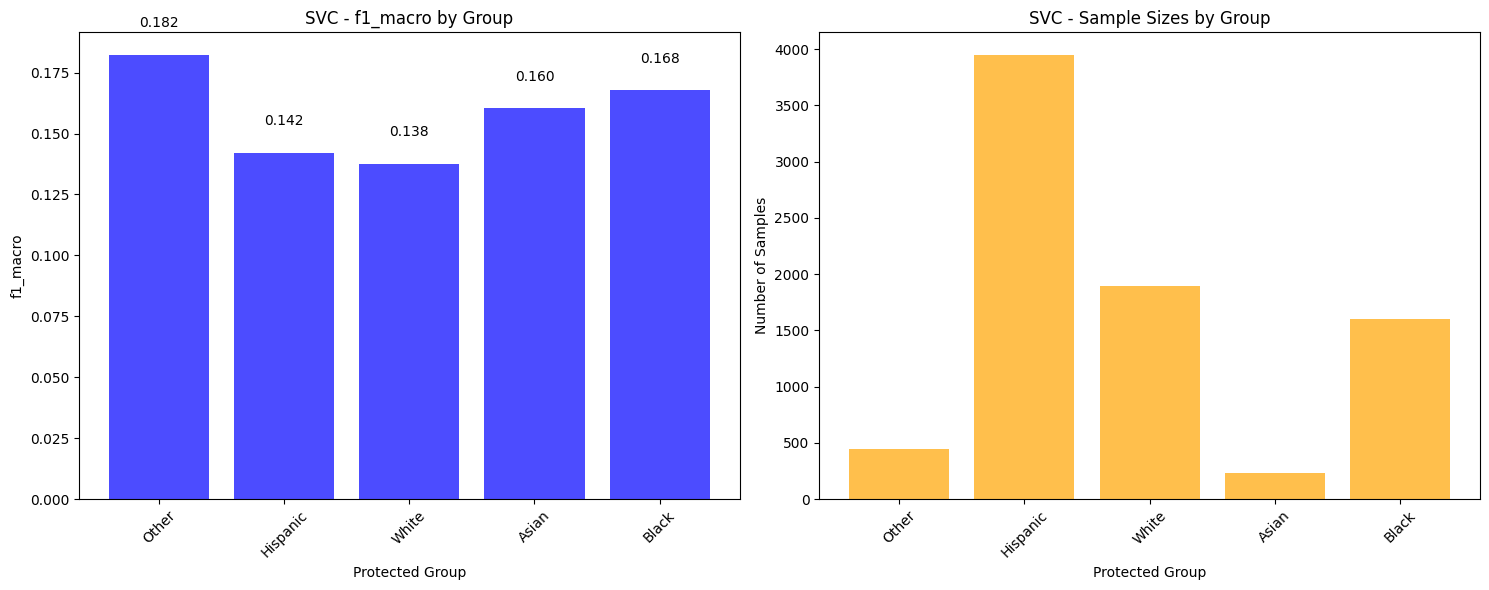


SVC - f1_macro Disparities Using the Absolute Difference from Mean:
Other: 0.0243
Hispanic: 0.0160
White: 0.0205
Asian: 0.0024
Black: 0.0097

Analyzing XGBoost
Error analyzing XGBoost: Mix of label input types (string and number)
ANALYZING FAIRNESS BY: Vict Age Group
Protected groups: ['Adults_25_49', 'Adolescents_13_17', 'Children_0_12', 'Young_Adults_18_24', 'Older_Adults_50_plus', nan]

Analyzing Decision Tree


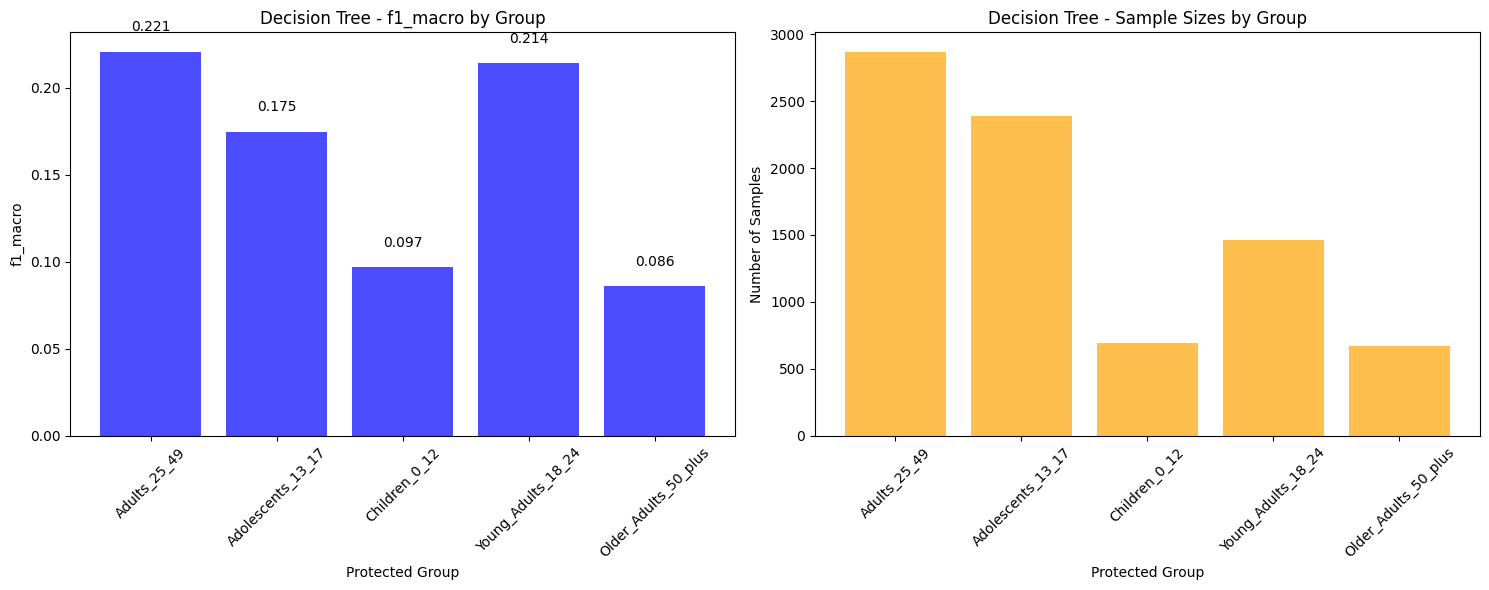


Decision Tree - f1_macro Disparities Using the Absolute Difference from Mean:
Adults_25_49: 0.0623
Adolescents_13_17: 0.0163
Children_0_12: 0.0615
Young_Adults_18_24: 0.0555
Older_Adults_50_plus: 0.0726

Analyzing Random Forest


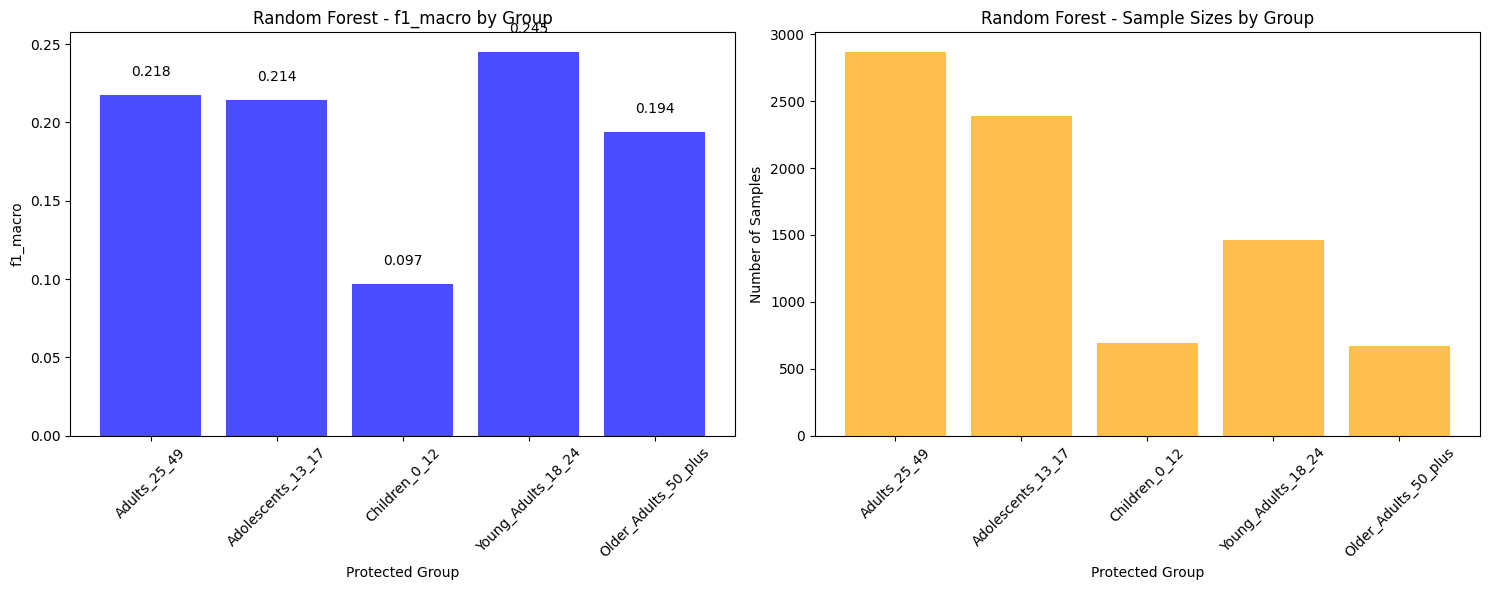


Random Forest - f1_macro Disparities Using the Absolute Difference from Mean:
Adults_25_49: 0.0240
Adolescents_13_17: 0.0206
Children_0_12: 0.0966
Young_Adults_18_24: 0.0516
Older_Adults_50_plus: 0.0004

Analyzing SVC


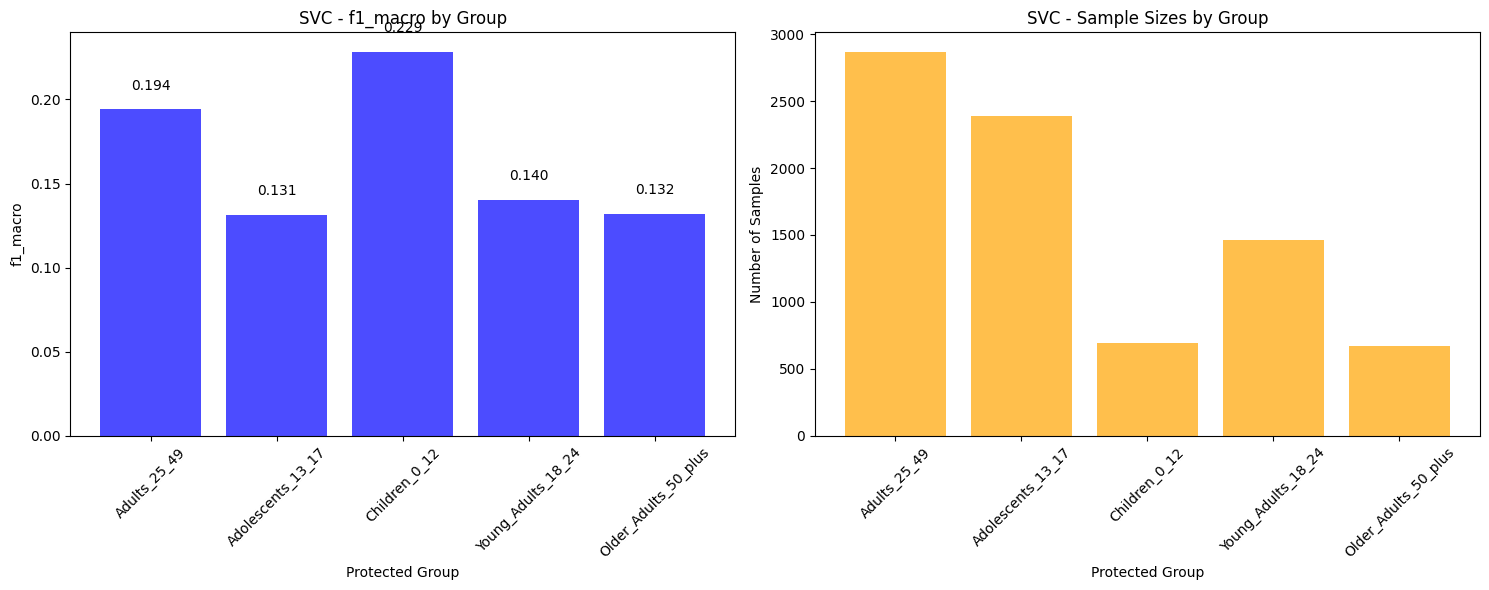


SVC - f1_macro Disparities Using the Absolute Difference from Mean:
Adults_25_49: 0.0288
Adolescents_13_17: 0.0339
Children_0_12: 0.0632
Young_Adults_18_24: 0.0250
Older_Adults_50_plus: 0.0331

Analyzing XGBoost
Error analyzing XGBoost: Mix of label input types (string and number)
ANALYZING FAIRNESS BY: AREA NAME
Protected groups: ['Olympic', 'Mission', 'Wilshire', 'Topanga', 'West LA', 'Southeast', 'Harbor', 'Pacific', 'N Hollywood', 'Newton', 'Northeast', 'Rampart', 'Foothill', 'Central', 'Southwest', 'Hollywood', 'Devonshire', 'Van Nuys', '77th Street', 'West Valley', 'Hollenbeck']

Analyzing Decision Tree


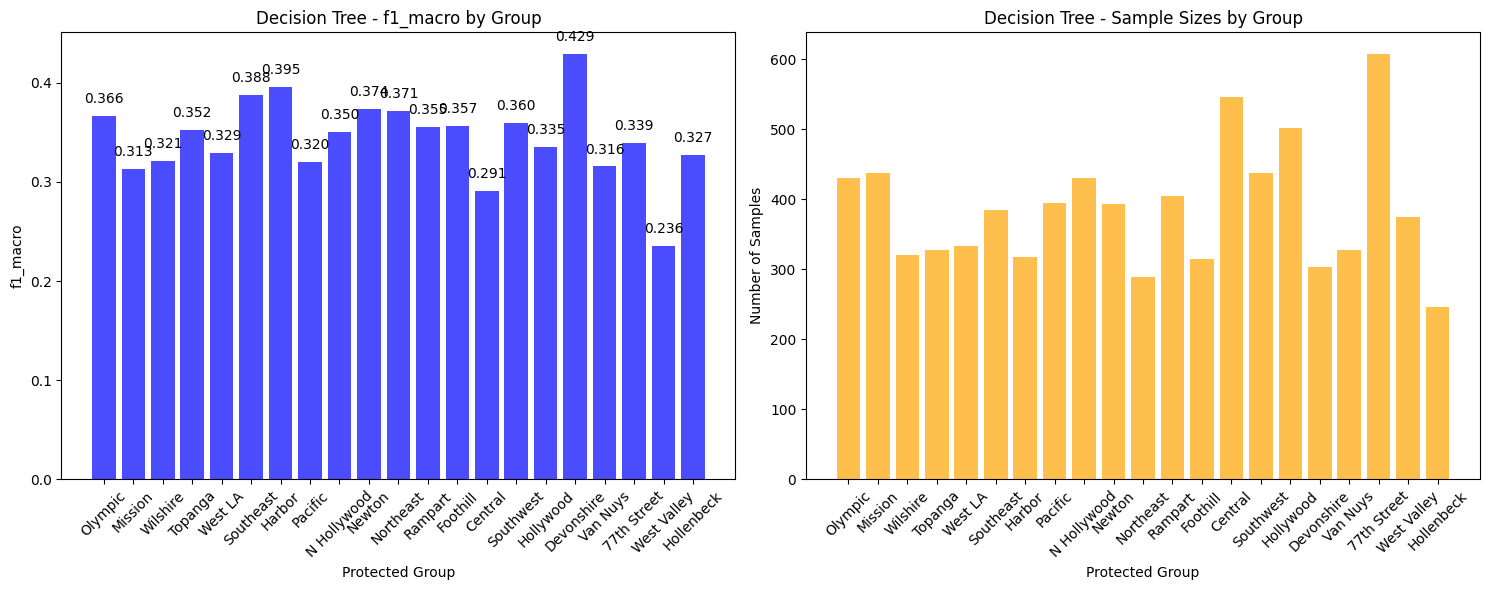


Decision Tree - f1_macro Disparities Using the Absolute Difference from Mean:
Olympic: 0.0223
Mission: 0.0307
Wilshire: 0.0233
Topanga: 0.0079
West LA: 0.0150
Southeast: 0.0437
Harbor: 0.0513
Pacific: 0.0237
N Hollywood: 0.0063
Newton: 0.0295
Northeast: 0.0274
Rampart: 0.0110
Foothill: 0.0125
Central: 0.0531
Southwest: 0.0158
Hollywood: 0.0089
Devonshire: 0.0853
Van Nuys: 0.0285
77th Street: 0.0046
West Valley: 0.1085
Hollenbeck: 0.0168

Analyzing Random Forest


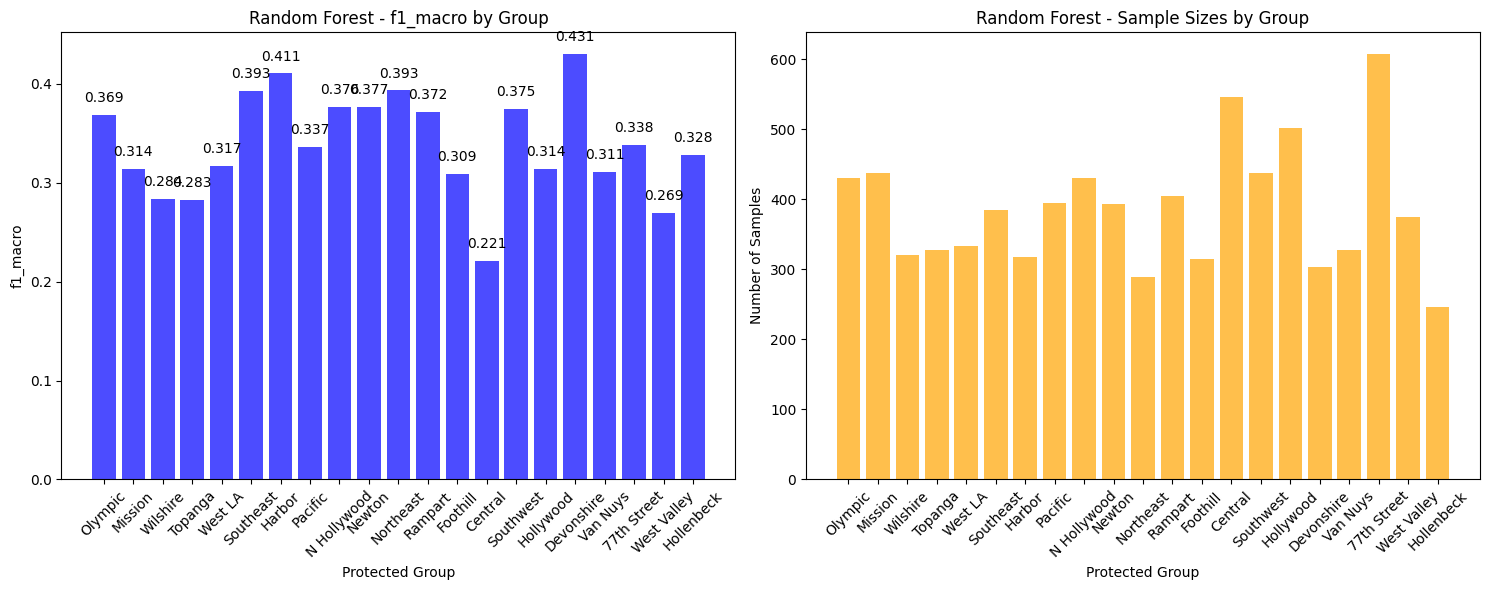


Random Forest - f1_macro Disparities Using the Absolute Difference from Mean:
Olympic: 0.0296
Mission: 0.0254
Wilshire: 0.0551
Topanga: 0.0560
West LA: 0.0217
Southeast: 0.0537
Harbor: 0.0716
Pacific: 0.0025
N Hollywood: 0.0373
Newton: 0.0375
Northeast: 0.0543
Rampart: 0.0327
Foothill: 0.0304
Central: 0.1178
Southwest: 0.0355
Hollywood: 0.0251
Devonshire: 0.0916
Van Nuys: 0.0282
77th Street: 0.0008
West Valley: 0.0699
Hollenbeck: 0.0110

Analyzing SVC


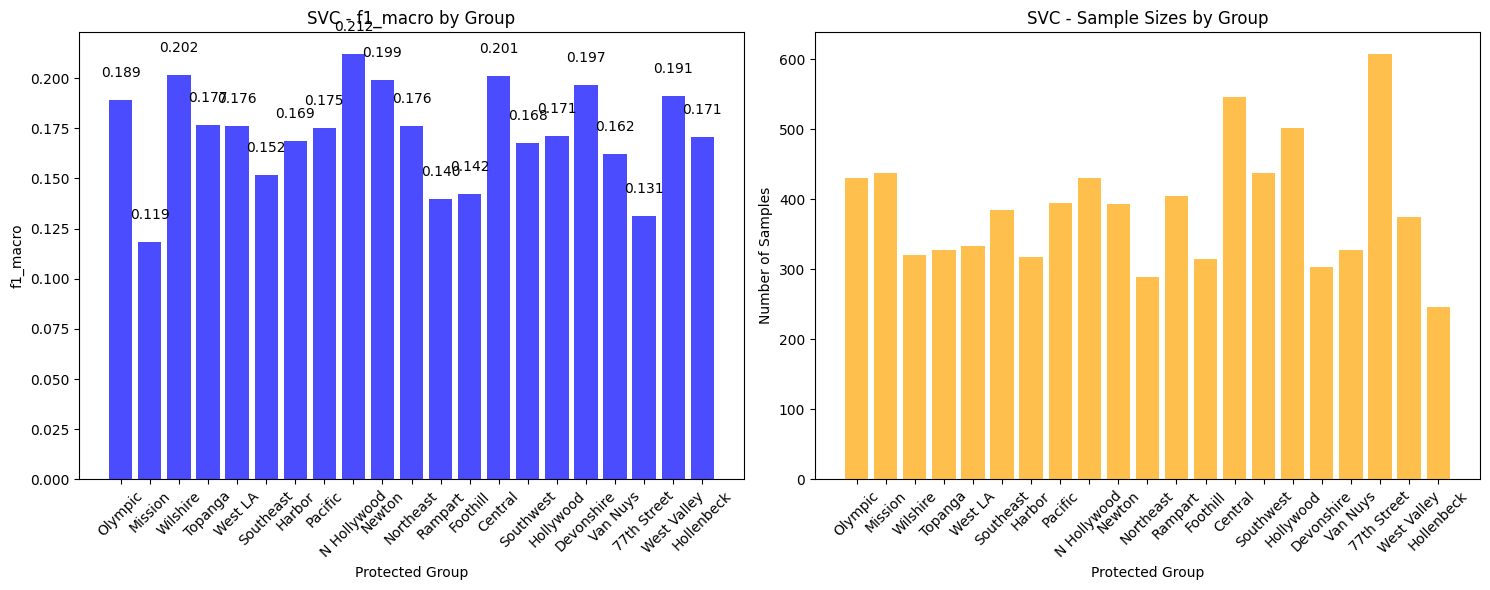


SVC - f1_macro Disparities Using the Absolute Difference from Mean:
Olympic: 0.0166
Mission: 0.0538
Wilshire: 0.0293
Topanga: 0.0044
West LA: 0.0039
Southeast: 0.0207
Harbor: 0.0035
Pacific: 0.0030
N Hollywood: 0.0399
Newton: 0.0267
Northeast: 0.0037
Rampart: 0.0324
Foothill: 0.0302
Central: 0.0288
Southwest: 0.0048
Hollywood: 0.0013
Devonshire: 0.0243
Van Nuys: 0.0102
77th Street: 0.0412
West Valley: 0.0189
Hollenbeck: 0.0016

Analyzing XGBoost
Error analyzing XGBoost: Mix of label input types (string and number)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def calculate_fairness_metrics(model, X_test, y_test, protected_attribute, protected_values):
    metrics = {}
    y_pred = model.predict(X_test)
    
    for value in protected_values:
        mask = (X_test[protected_attribute] == value)
        if mask.sum() == 0:
            continue
            
        y_true_group = y_test[mask]
        y_pred_group = y_pred[mask]
        
        metrics[value] = {
            'accuracy': accuracy_score(y_true_group, y_pred_group),
            'precision_macro': precision_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'recall_macro': recall_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'f1_macro': f1_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'size': len(y_true_group)
        }
    
    return metrics

def plot_fairness_disparities(metrics_dict, model_name, metric_name='f1_macro'):
    groups = list(metrics_dict.keys())
    metric_values = [metrics_dict[group][metric_name] for group in groups]
    sizes = [metrics_dict[group]['size'] for group in groups]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    bars = ax1.bar(groups, metric_values, color='blue', alpha=0.7)
    ax1.set_title(f'{model_name} - {metric_name} by Group')
    ax1.set_ylabel(metric_name)
    ax1.set_xlabel('Protected Group')
    ax1.tick_params(axis='x', rotation=45)
    
    for bar, value in zip(bars, metric_values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom')
    

    ax2.bar(groups, sizes, color='orange', alpha=0.7)
    ax2.set_title(f'{model_name} - Sample Sizes by Group')
    ax2.set_ylabel('Number of Samples')
    ax2.set_xlabel('Protected Group')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    

    overall_metric = np.mean(metric_values)
    disparities = {group: abs(value - overall_metric) for group, value in zip(groups, metric_values)}
    
    print(f"\n{model_name} - {metric_name} Disparities Using the Absolute Difference from Mean:")
    for group, disparity in disparities.items():
        print(f"{group}: {disparity:.4f}")
    
    return disparities

results = [
    {'model': 'Decision Tree', 'estimator': dt_pipeline, 'y_pred': y_pred_dt},
    {'model': 'Random Forest', 'estimator': rf_pipeline, 'y_pred': y_pred_rf},
    {'model': 'SVC', 'estimator': svc_pipeline, 'y_pred': y_pred_svc},
    {'model': 'XGBoost', 'estimator': xgb_pipeline, 'y_pred': y_pred_xgb}
]


demographic_attributes = ['Vict Sex', 'Vict Descent Full', 'Vict Age Group', 'AREA NAME']

for protected_attr in demographic_attributes:
    if protected_attr in X_demo.columns:
        print(f"ANALYZING FAIRNESS BY: {protected_attr}")
        
        protected_values = X_demo[protected_attr].unique()
        print(f"Protected groups: {list(protected_values)}")
        
        for result in results:
            model_name = result['model']
            model = result['estimator']
            
            print(f"\nAnalyzing {model_name}")
            
            try:
                metrics = calculate_fairness_metrics(model, X_demo, y_demo, protected_attr, protected_values)
                if metrics:  
                    disparities = plot_fairness_disparities(metrics, model_name)
                else:
                    print(f"No metrics calculated for {model_name} - possibly no samples in groups")
            except Exception as e:
                print(f"Error analyzing {model_name}: {e}")
    else:
        print(f"\nProtected attribute '{protected_attr}' not found in data")

def plot_comparative_fairness(results, X_data, y_data, protected_attr, metric_name='f1_macro'):
    if protected_attr not in X_data.columns:
        print(f"Protected attribute '{protected_attr}' not found in data")
        return
    
    protected_values = X_data[protected_attr].unique()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    model_metrics = {}
    
    for i, result in enumerate(results):
        if i >= len(axes):
            break
            
        model_name = result['model']
        model = result['estimator']
        
        try:
            metrics = calculate_fairness_metrics(model, X_data, y_data, protected_attr, protected_values)
            model_metrics[model_name] = metrics
            
            groups = list(metrics.keys())
            metric_values = [metrics[group][metric_name] for group in groups]
            
            bars = axes[i].bar(groups, metric_values, color=plt.cm.Set3(i/len(results)))
            axes[i].set_title(f'{model_name}\n{metric_name} by Group')
            axes[i].set_ylabel(metric_name)
            axes[i].tick_params(axis='x', rotation=45)
            
            for bar, value in zip(bars, metric_values):
                axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                           f'{value:.3f}', ha='center', va='bottom', fontsize=8)
            
        except Exception as e:
            print(f"Error with {model_name}: {e}")
            axes[i].set_title(f'{model_name}\nError')
    
    plt.tight_layout()
    plt.show()
    
    return model_metrics

def calculate_disparity_ratios(metrics_dict, metric_name='f1_macro'):
    disparities = {}
    
    for model_name, metrics in metrics_dict.items():
        values = [metrics[group][metric_name] for group in metrics.keys()]
        if len(values) > 1:
            min_val = min(values)
            max_val = max(values)
            disparity_ratio = min_val / max_val if max_val > 0 else 0
            disparities[model_name] = {
                'min': min_val,
                'max': max_val,
                'ratio': disparity_ratio,
                'range': max_val - min_val
            }
    
    return disparities



XGBoost Fairness Disparity Plot

Analyzing XGBoost fairness

Analyzing fairness by: Vict Sex
Protected groups: ['M', 'F']

Analyzing XGBoost


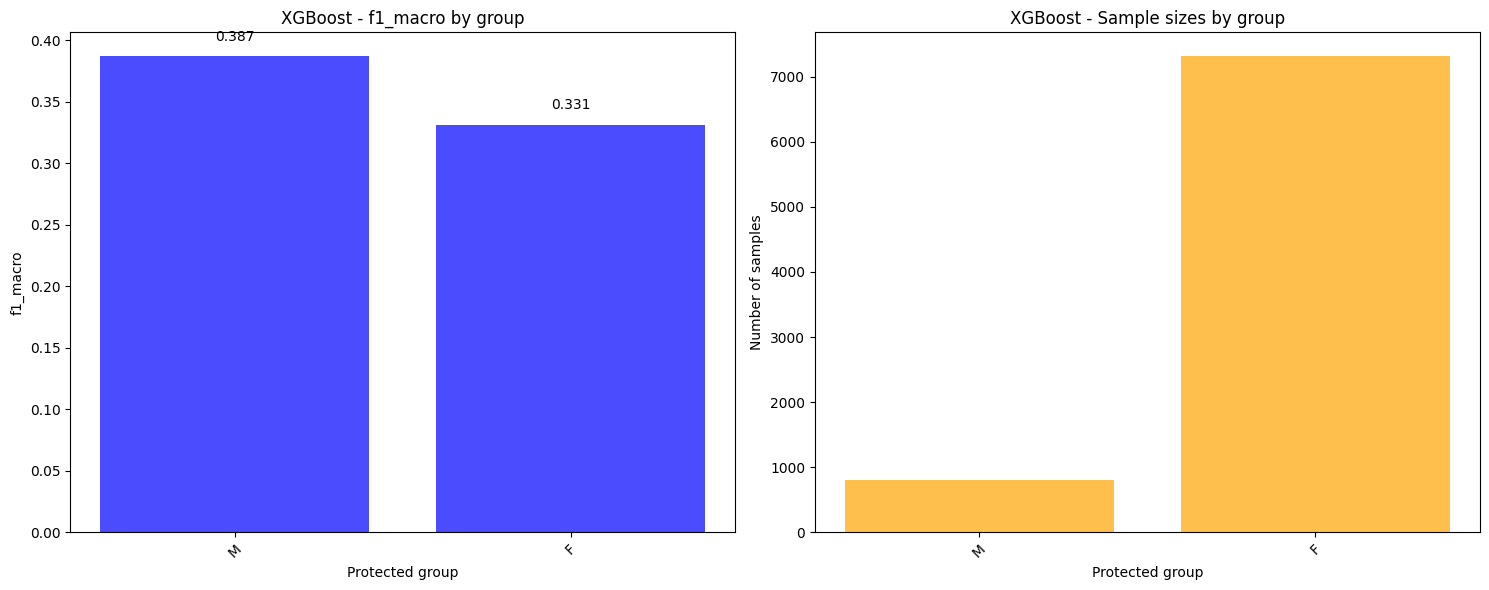


XGBoost - f1_macro disparities using the absolute difference from mean:
M: 0.0278
F: 0.0278

Analyzing fairness by: Vict Descent Full
Protected groups: ['Other', 'Hispanic', 'White', 'Asian', 'Black']

Analyzing XGBoost


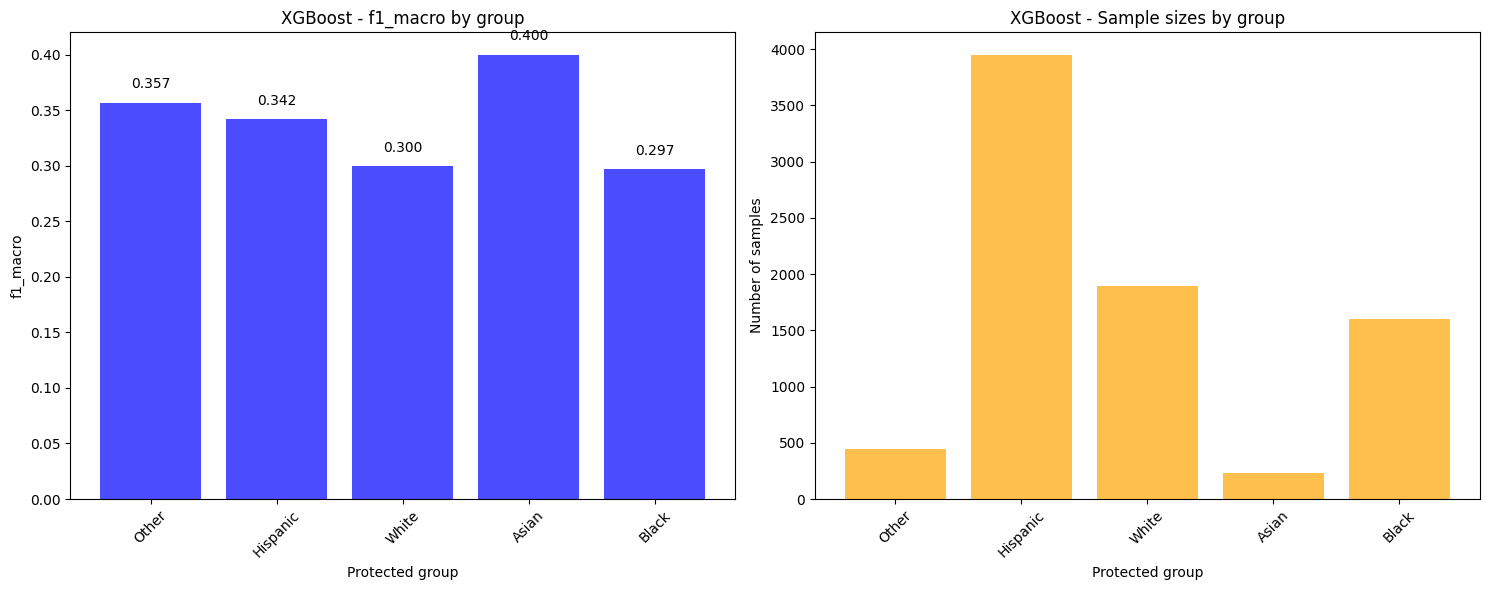


XGBoost - f1_macro disparities using the absolute difference from mean:
Other: 0.0177
Hispanic: 0.0030
White: 0.0391
Asian: 0.0609
Black: 0.0425

Analyzing fairness by: Vict Age Group
Protected groups: ['Adults_25_49', 'Adolescents_13_17', 'Children_0_12', 'Young_Adults_18_24', 'Older_Adults_50_plus', nan]

Analyzing XGBoost


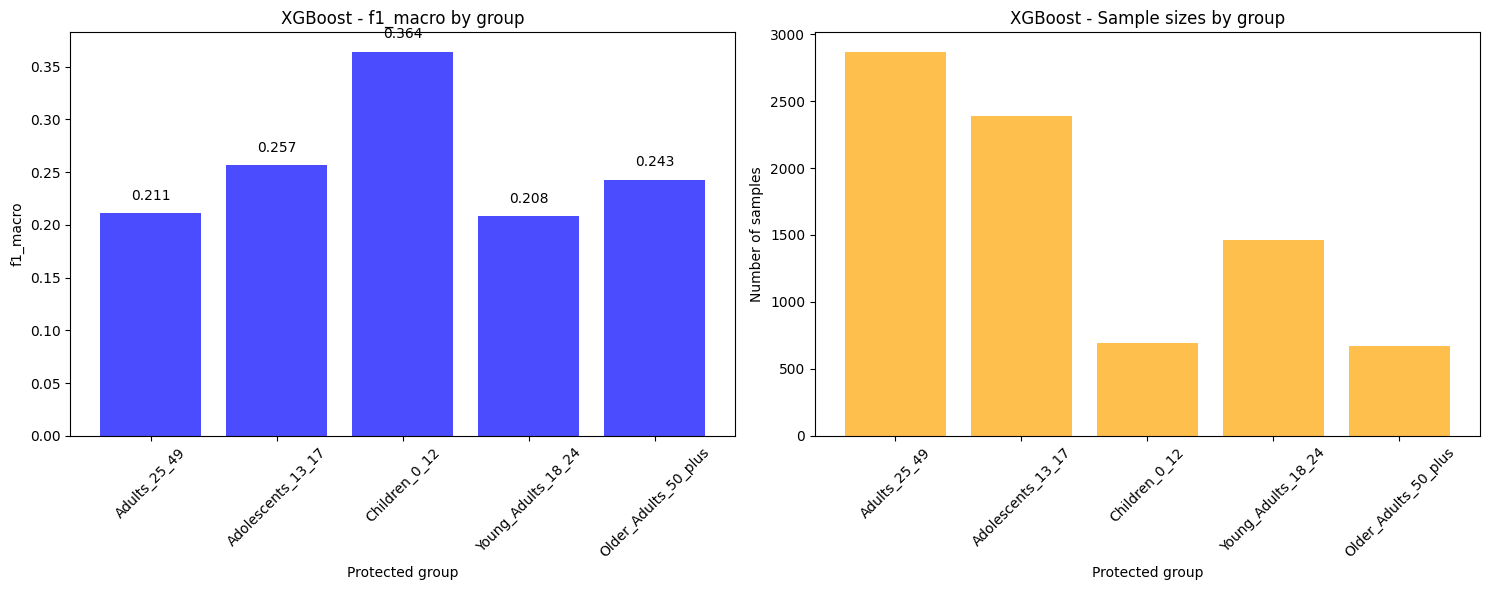


XGBoost - f1_macro disparities using the absolute difference from mean:
Adults_25_49: 0.0457
Adolescents_13_17: 0.0001
Children_0_12: 0.1078
Young_Adults_18_24: 0.0486
Older_Adults_50_plus: 0.0136

Analyzing fairness by: AREA NAME
Protected groups: ['Olympic', 'Mission', 'Wilshire', 'Topanga', 'West LA', 'Southeast', 'Harbor', 'Pacific', 'N Hollywood', 'Newton', 'Northeast', 'Rampart', 'Foothill', 'Central', 'Southwest', 'Hollywood', 'Devonshire', 'Van Nuys', '77th Street', 'West Valley', 'Hollenbeck']

Analyzing XGBoost


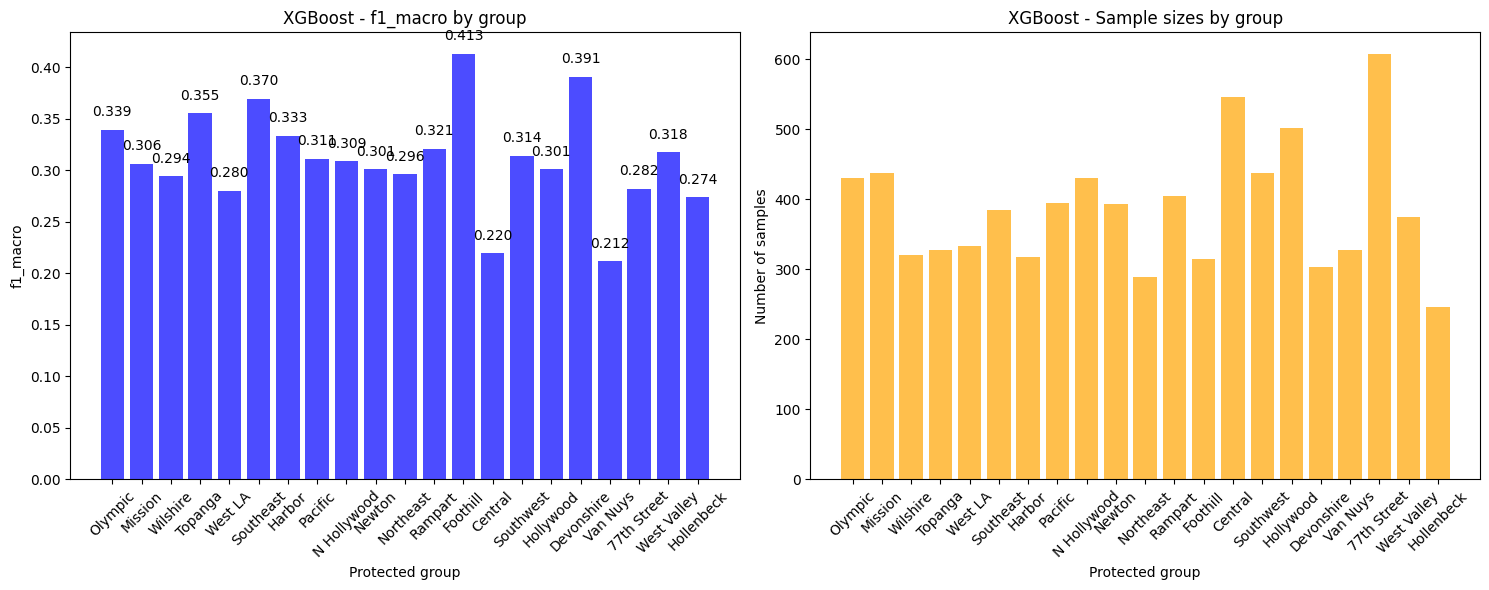


XGBoost - f1_macro disparities using the absolute difference from mean:
Olympic: 0.0277
Mission: 0.0050
Wilshire: 0.0172
Topanga: 0.0438
West LA: 0.0313
Southeast: 0.0581
Harbor: 0.0219
Pacific: 0.0004
N Hollywood: 0.0027
Newton: 0.0103
Northeast: 0.0155
Rampart: 0.0095
Foothill: 0.1016
Central: 0.0917
Southwest: 0.0026
Hollywood: 0.0101
Devonshire: 0.0794
Van Nuys: 0.0999
77th Street: 0.0295
West Valley: 0.0061
Hollenbeck: 0.0373
XGBoost fairness comparison across demographic attributes

Comparing XGBoost by: Vict Sex


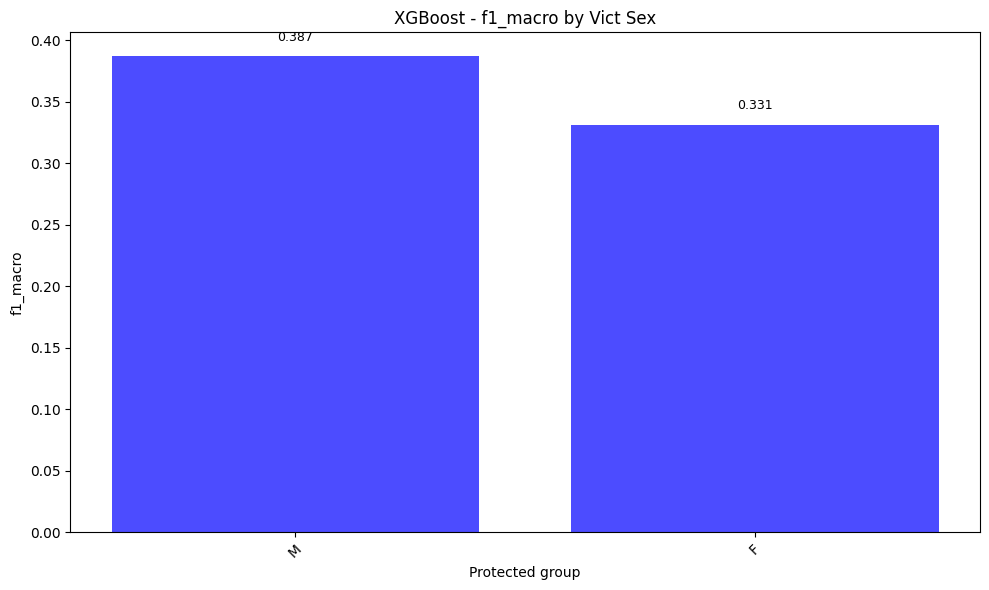


XGBoost disparity analysis for Vict Sex:
Ratio (min/max): 0.856
Range (max-min): 0.056
Average f1_macro: 0.359

Comparing XGBoost by: Vict Descent Full


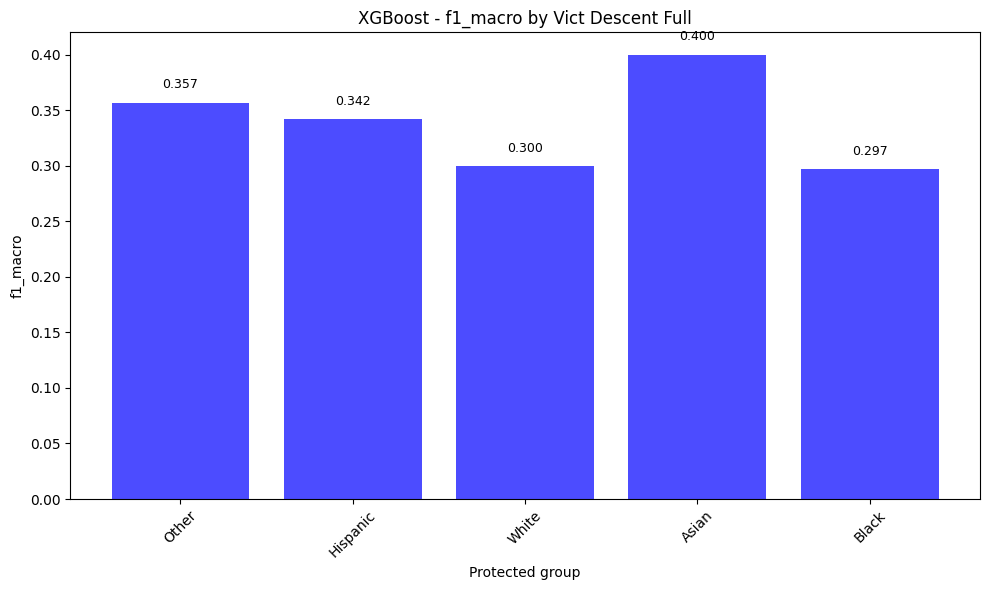


XGBoost disparity analysis for Vict Descent Full:
Ratio (min/max): 0.742
Range (max-min): 0.103
Average f1_macro: 0.339

Comparing XGBoost by: Vict Age Group


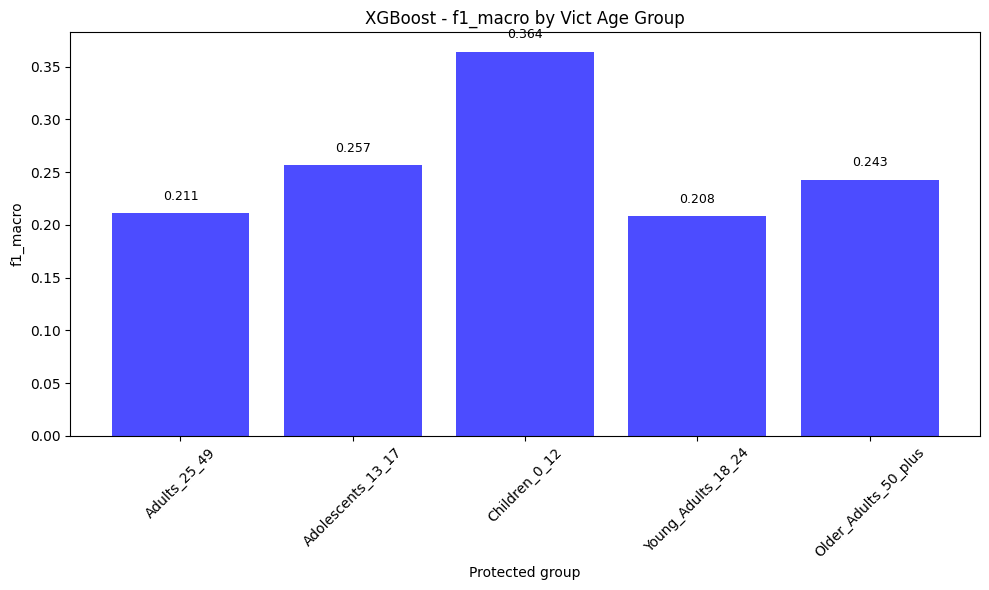


XGBoost disparity analysis for Vict Age Group:
Ratio (min/max): 0.571
Range (max-min): 0.156
Average f1_macro: 0.257

Comparing XGBoost by: AREA NAME


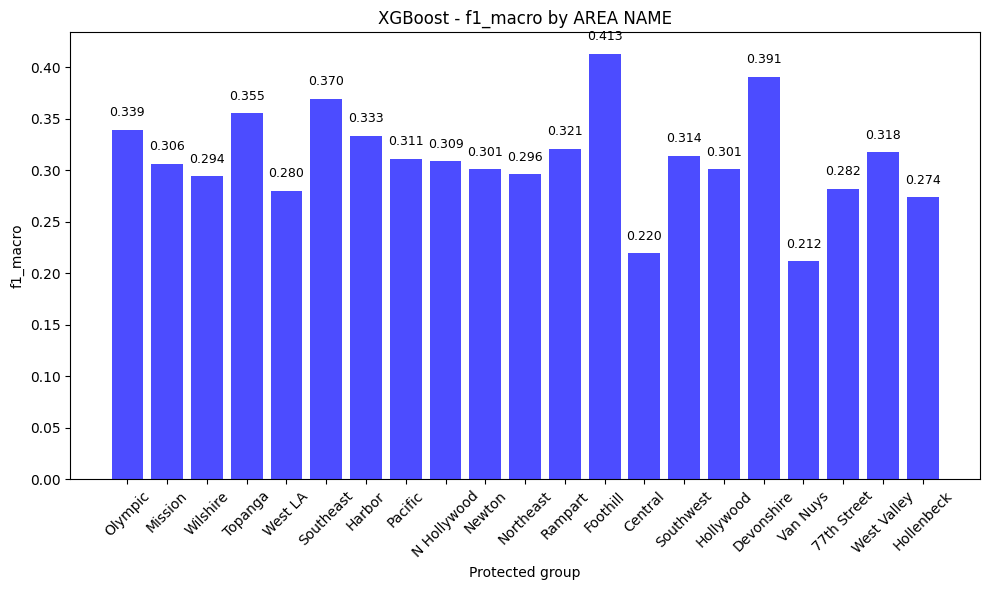


XGBoost disparity analysis for AREA NAME:
Ratio (min/max): 0.512
Range (max-min): 0.202
Average f1_macro: 0.311
Overall XGBoost fairness summary
Protected_Attribute Disparity_Ratio Fairness_Score Min_F1 Max_F1
           Vict Sex           0.856          14.4%  0.331  0.387
  Vict Descent Full           0.742          25.8%  0.297  0.400
     Vict Age Group           0.571          42.9%  0.208  0.364
          AREA NAME           0.512          48.8%  0.212  0.413


In [ ]:
def calculate_fairness_metrics_xgb(model, X_test, y_test, protected_attribute, protected_values, label_encoder):
    metrics = {}
    y_pred_encoded = model.predict(X_test)
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    
    for value in protected_values:
        mask = (X_test[protected_attribute] == value)
        if mask.sum() == 0:
            continue
            
        y_true_group = y_test[mask]
        y_pred_group = y_pred[mask]
        
        metrics[value] = {
            'accuracy': accuracy_score(y_true_group, y_pred_group),
            'precision_macro': precision_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'recall_macro': recall_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'f1_macro': f1_score(y_true_group, y_pred_group, average='macro', zero_division=0),
            'size': len(y_true_group)
        }
    
    return metrics

def plot_fairness_disparities(metrics_dict, model_name, metric_name='f1_macro'):
    groups = list(metrics_dict.keys())
    metric_values = [metrics_dict[group][metric_name] for group in groups]
    sizes = [metrics_dict[group]['size'] for group in groups]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    bars = ax1.bar(groups, metric_values, color='blue', alpha=0.7)
    ax1.set_title(f'{model_name} - {metric_name} by group')
    ax1.set_ylabel(metric_name)
    ax1.set_xlabel('Protected group')
    ax1.tick_params(axis='x', rotation=45)
    
    for bar, value in zip(bars, metric_values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom')

    ax2.bar(groups, sizes, color='orange', alpha=0.7)
    ax2.set_title(f'{model_name} - Sample sizes by group')
    ax2.set_ylabel('Number of samples')
    ax2.set_xlabel('Protected group')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

    overall_metric = np.mean(metric_values)
    disparities = {group: abs(value - overall_metric) for group, value in zip(groups, metric_values)}
    
    print(f"\n{model_name} - {metric_name} disparities using the absolute difference from mean:")
    for group, disparity in disparities.items():
        print(f"{group}: {disparity:.4f}")
    
    return disparities

results_xgb = [
    {'model': 'XGBoost', 'estimator': xgb_pipeline, 'y_pred': y_pred_xgb}
]

demographic_attributes = ['Vict Sex', 'Vict Descent Full', 'Vict Age Group', 'AREA NAME']

print("Analyzing XGBoost fairness")
for protected_attr in demographic_attributes:
    if protected_attr in X_demo.columns:
        print(f"\nAnalyzing fairness by: {protected_attr}")
        
        protected_values = X_demo[protected_attr].unique()
        print(f"Protected groups: {list(protected_values)}")
        
        for result in results_xgb:
            model_name = result['model']
            model = result['estimator']
            
            print(f"\nAnalyzing {model_name}")
            
            try:
                metrics = calculate_fairness_metrics_xgb(model, X_demo, y_demo, protected_attr, protected_values, label_encoder)
                if metrics:  
                    disparities = plot_fairness_disparities(metrics, model_name)
                else:
                    print(f"No metrics calculated for {model_name} - possibly no samples in groups")
            except Exception as e:
                print(f"Error analyzing {model_name}: {e}")
    else:
        print(f"\nProtected attribute '{protected_attr}' not found in data")

def plot_xgboost_fairness_comparison(X_data, y_data, protected_attr, label_encoder, metric_name='f1_macro'):
    if protected_attr not in X_data.columns:
        print(f"Protected attribute '{protected_attr}' not found in data")
        return
    
    protected_values = X_data[protected_attr].unique()
    
    plt.figure(figsize=(10, 6))
    
    try:
        metrics = calculate_fairness_metrics_xgb(xgb_pipeline, X_data, y_data, protected_attr, protected_values, label_encoder)
        
        groups = list(metrics.keys())
        metric_values = [metrics[group][metric_name] for group in groups]
        
        bars = plt.bar(groups, metric_values, color='blue', alpha=0.7)
        plt.title(f'XGBoost - {metric_name} by {protected_attr}')
        plt.ylabel(metric_name)
        plt.xlabel('Protected group')
        plt.xticks(rotation=45)
        
        for bar, value in zip(bars, metric_values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.3f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        if len(metric_values) > 1:
            min_val = min(metric_values)
            max_val = max(metric_values)
            disparity_ratio = min_val / max_val if max_val > 0 else 0
            disparity_range = max_val - min_val
            
            print(f"\nXGBoost disparity analysis for {protected_attr}:")
            print(f"Ratio (min/max): {disparity_ratio:.3f}")
            print(f"Range (max-min): {disparity_range:.3f}")
            print(f"Average {metric_name}: {np.mean(metric_values):.3f}")
            
        return metrics
        
    except Exception as e:
        print(f"Error analyzing XGBoost for {protected_attr}: {e}")
        return None

print("XGBoost fairness comparison across demographic attributes")

all_metrics = {}
for protected_attr in demographic_attributes:
    if protected_attr in X_demo.columns:
        print(f"\nComparing XGBoost by: {protected_attr}")
        metrics = plot_xgboost_fairness_comparison(X_demo, y_demo, protected_attr, label_encoder)
        if metrics:
            all_metrics[protected_attr] = metrics

print("Overall XGBoost fairness summary")

fairness_scores = []
for protected_attr, metrics in all_metrics.items():
    values = [metrics[group]['f1_macro'] for group in metrics.keys()]
    if len(values) > 1:
        disparity_ratio = min(values) / max(values) if max(values) > 0 else 0
        fairness_scores.append({
            'Protected_Attribute': protected_attr,
            'Disparity_Ratio': f"{disparity_ratio:.3f}",
            'Fairness_Score': f"{(1 - disparity_ratio) * 100:.1f}%",
            'Min_F1': f"{min(values):.3f}",
            'Max_F1': f"{max(values):.3f}"
        })

if fairness_scores:
    fairness_df = pd.DataFrame(fairness_scores)
    print(fairness_df.to_string(index=False))
else:
    print("No fairness metrics calculated.")

Comprehensive fairness comparison
Converted y_demo from categorical to string

Comparing models by: Vict Sex


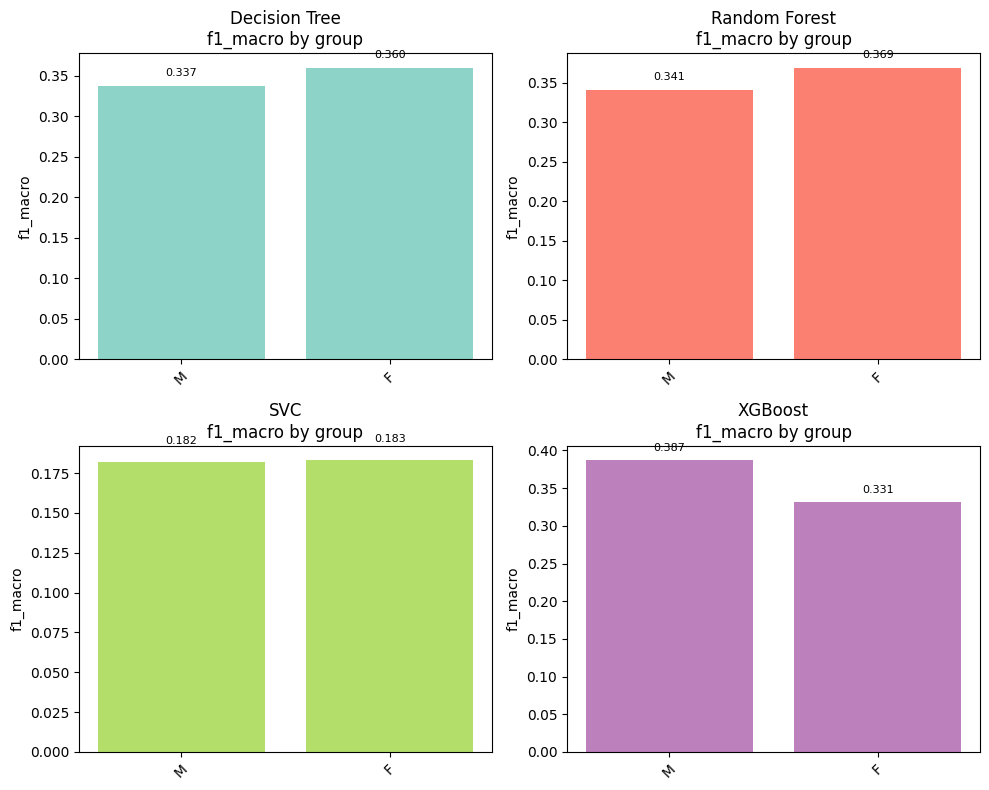


Disparity analysis for Vict Sex:
Decision Tree: Ratio = 0.937, Range = 0.023
Random Forest: Ratio = 0.923, Range = 0.028
SVC: Ratio = 0.993, Range = 0.001
XGBoost: Ratio = 0.856, Range = 0.056

Comparing models by: Vict Descent Full


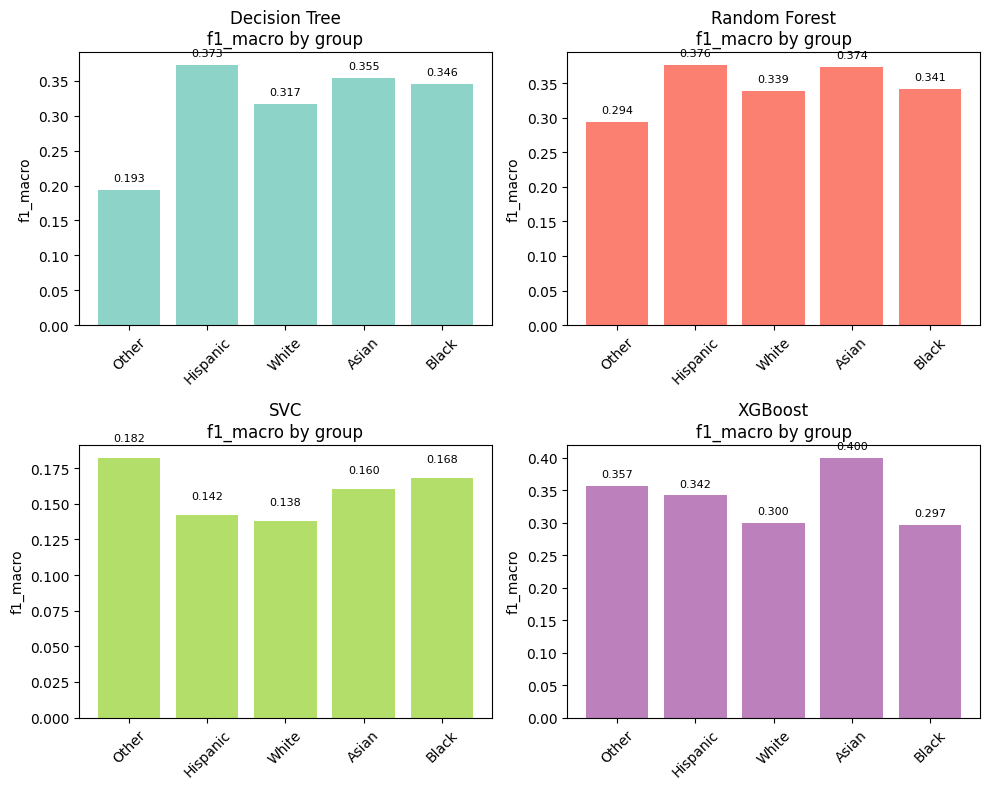


Disparity analysis for Vict Descent Full:
Decision Tree: Ratio = 0.518, Range = 0.180
Random Forest: Ratio = 0.782, Range = 0.082
SVC: Ratio = 0.754, Range = 0.045
XGBoost: Ratio = 0.742, Range = 0.103

Comparing models by: Vict Age Group


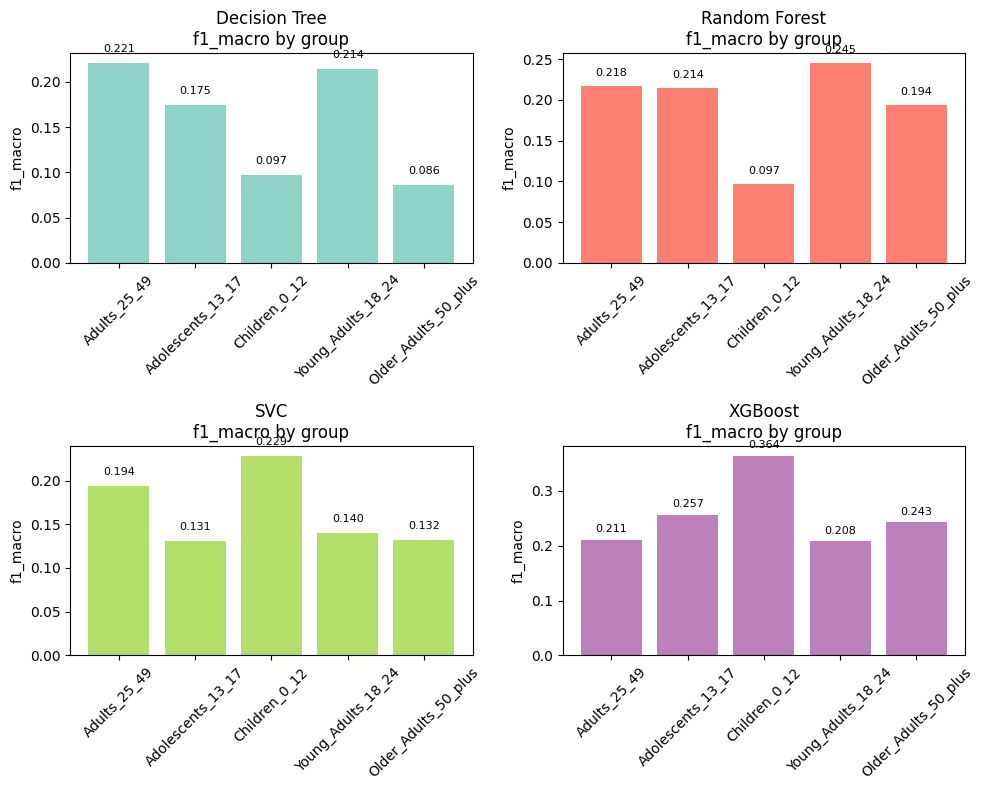


Disparity analysis for Vict Age Group:
Decision Tree: Ratio = 0.389, Range = 0.135
Random Forest: Ratio = 0.395, Range = 0.148
SVC: Ratio = 0.575, Range = 0.097
XGBoost: Ratio = 0.571, Range = 0.156

Comparing models by: AREA NAME


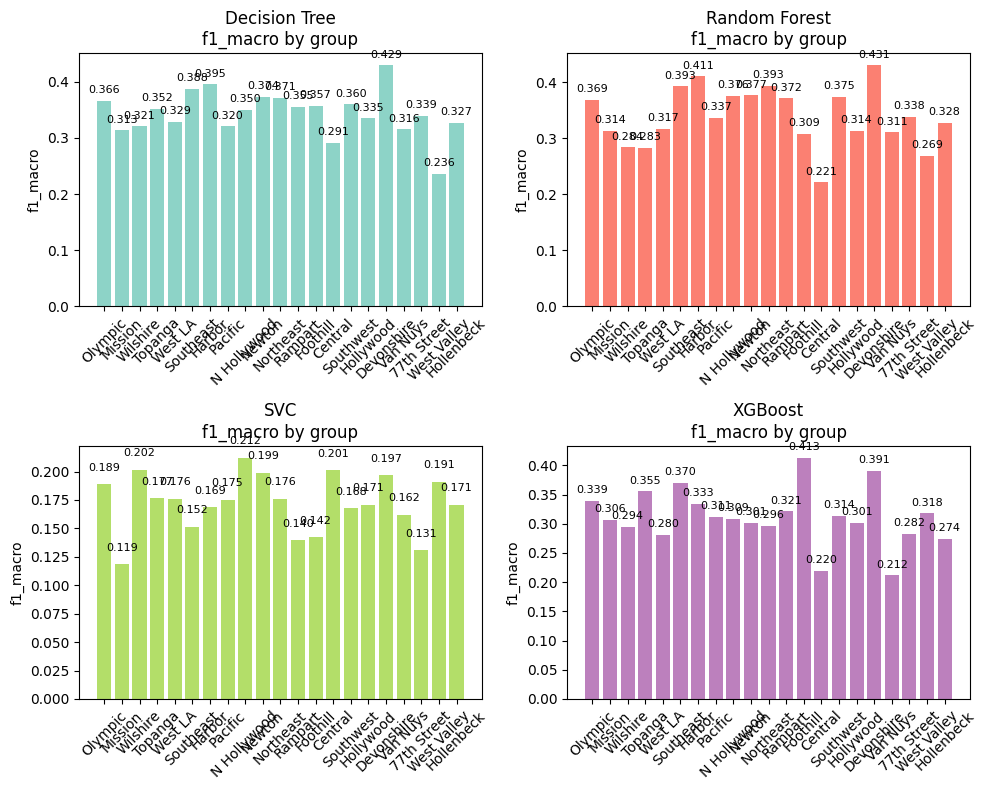


Disparity analysis for AREA NAME:
Decision Tree: Ratio = 0.549, Range = 0.194
Random Forest: Ratio = 0.514, Range = 0.209
SVC: Ratio = 0.559, Range = 0.094
XGBoost: Ratio = 0.512, Range = 0.202

Overall fairness summary
        Model Avg disparity ratio Fairness score  Attributes evaluated
Decision Tree               0.598          40.2%                     4
Random Forest               0.654          34.6%                     4
          SVC               0.720          28.0%                     4
      XGBoost               0.670          33.0%                     4


In [ ]:
def calculate_fairness_metrics_unified(model, X_test, y_test, protected_attribute, protected_values, label_encoder=None):

    metrics = {}
    y_pred = model.predict(X_test)
    
    try:
        if hasattr(y_test, 'cat'):
            y_test_str = y_test.astype(str)
        else:
            y_test_str = y_test.astype(str) if hasattr(y_test, 'astype') else [str(x) for x in y_test]
        

        if label_encoder is not None:
            try:
                y_pred_str = label_encoder.inverse_transform(y_pred)
                y_pred_str = y_pred_str.astype(str) if hasattr(y_pred_str, 'astype') else [str(x) for x in y_pred_str]
            except Exception as e:
                print(f"Warning: Could not transform predictions with label_encoder: {e}")
                y_pred_str = y_pred.astype(str) if hasattr(y_pred, 'astype') else [str(x) for x in y_pred]
        else:
            y_pred_str = y_pred.astype(str) if hasattr(y_pred, 'astype') else [str(x) for x in y_pred]
            
    except Exception as e:
        print(f"Error in type conversion: {e}")
        y_test_str = [str(x) for x in y_test]
        y_pred_str = [str(x) for x in y_pred]
    
    for value in protected_values:
        mask = (X_test[protected_attribute] == value)
        if mask.sum() == 0:
            continue
            
        y_true_group = y_test_str[mask] if hasattr(y_test_str, '__getitem__') else [y_test_str[i] for i in range(len(mask)) if mask[i]]
        y_pred_group = y_pred_str[mask] if hasattr(y_pred_str, '__getitem__') else [y_pred_str[i] for i in range(len(mask)) if mask[i]]
        
        if len(y_true_group) == 0 or len(y_pred_group) == 0:
            continue
            
        try:
            metrics[value] = {
                'accuracy': accuracy_score(y_true_group, y_pred_group),
                'precision_macro': precision_score(y_true_group, y_pred_group, average='macro', zero_division=0),
                'recall_macro': recall_score(y_true_group, y_pred_group, average='macro', zero_division=0),
                'f1_macro': f1_score(y_true_group, y_pred_group, average='macro', zero_division=0),
                'size': len(y_true_group)
            }
        except Exception as e:
            print(f"Error calculating metrics for group {value}: {e}")
            continue
    
    return metrics

def plot_fairness_disparities(metrics_dict, model_name, metric_name='f1_macro'):

    if not metrics_dict:
        print(f"No metrics available for {model_name}")
        return {}
        
    groups = list(metrics_dict.keys())
    metric_values = [metrics_dict[group][metric_name] for group in groups]
    sizes = [metrics_dict[group]['size'] for group in groups]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    bars = ax1.bar(groups, metric_values, color='blue', alpha=0.7)
    ax1.set_title(f'{model_name} - {metric_name} by group')
    ax1.set_ylabel(metric_name)
    ax1.set_xlabel('Protected group')
    ax1.tick_params(axis='x', rotation=45)
    
    for bar, value in zip(bars, metric_values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom')
    

    ax2.bar(groups, sizes, color='orange', alpha=0.7)
    ax2.set_title(f'{model_name} - Sample sizes by group')
    ax2.set_ylabel('Number of samples')
    ax2.set_xlabel('Protected group')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    

    overall_metric = np.mean(metric_values)
    disparities = {group: abs(value - overall_metric) for group, value in zip(groups, metric_values)}
    
    print(f"\n{model_name} - {metric_name} disparities using the absolute difference from mean:")
    for group, disparity in disparities.items():
        print(f"{group}: {disparity:.4f}")
    
    return disparities

def plot_comparative_fairness(results, X_data, y_data, protected_attr, label_encoder=None, metric_name='f1_macro'):

    if protected_attr not in X_data.columns:
        print(f"Protected attribute '{protected_attr}' not found in data")
        return {}
    
    protected_values = X_data[protected_attr].unique()

    n_models = len(results)
    n_cols = min(2, n_models)
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_models == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    model_metrics = {}
    
    for i, result in enumerate(results):
        if i >= len(axes):
            break
            
        model_name = result['model']
        model = result['estimator']
        
        try:

            encoder_to_use = label_encoder if 'XGBoost' in model_name else None
            metrics = calculate_fairness_metrics_unified(
                model, X_data, y_data, protected_attr, protected_values, encoder_to_use
            )
            model_metrics[model_name] = metrics
            
            if metrics:
                groups = list(metrics.keys())
                metric_values = [metrics[group][metric_name] for group in groups]
                
                bars = axes[i].bar(groups, metric_values, color=plt.cm.Set3(i/len(results)))
                axes[i].set_title(f'{model_name}\n{metric_name} by group')
                axes[i].set_ylabel(metric_name)
                axes[i].tick_params(axis='x', rotation=45)
                
                for bar, value in zip(bars, metric_values):
                    axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                               f'{value:.3f}', ha='center', va='bottom', fontsize=8)
            else:
                axes[i].set_title(f'{model_name}\nNo metrics')
                axes[i].set_ylabel(metric_name)
            
        except Exception as e:
            print(f"Error with {model_name}: {e}")
            axes[i].set_title(f'{model_name}\nError')
            axes[i].set_ylabel(metric_name)
    
    for i in range(len(results), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return model_metrics

def calculate_disparity_ratios(metrics_dict, metric_name='f1_macro'):

    disparities = {}
    
    for model_name, metrics in metrics_dict.items():
        if metrics and len(metrics) > 1:
            values = [metrics[group][metric_name] for group in metrics.keys()]
            if len(values) > 1 and max(values) > 0:
                min_val = min(values)
                max_val = max(values)
                disparity_ratio = min_val / max_val
                disparities[model_name] = {
                    'min': min_val,
                    'max': max_val,
                    'ratio': disparity_ratio,
                    'range': max_val - min_val
                }
    
    return disparities

results = [
    {'model': 'Decision Tree', 'estimator': dt_pipeline},
    {'model': 'Random Forest', 'estimator': rf_pipeline},
    {'model': 'SVC', 'estimator': svc_pipeline},
    {'model': 'XGBoost', 'estimator': xgb_pipeline}
]

demographic_attributes = ['Vict Sex', 'Vict Descent Full', 'Vict Age Group', 'AREA NAME']

print("Comprehensive fairness comparison")

if hasattr(y_demo, 'cat'):
    y_demo_str = y_demo.astype(str)
    print("Converted y_demo from categorical to string")
else:
    y_demo_str = y_demo

for protected_attr in demographic_attributes:
    if protected_attr in X_demo.columns:
        print(f"\nComparing models by: {protected_attr}")
        
        model_metrics = plot_comparative_fairness(
            results, X_demo, y_demo_str, protected_attr, label_encoder
        )
        
        if model_metrics:
            disparities = calculate_disparity_ratios(model_metrics)
            print(f"\nDisparity analysis for {protected_attr}:")
            for model_name, disparity_info in disparities.items():
                print(f"{model_name}: Ratio = {disparity_info['ratio']:.3f}, Range = {disparity_info['range']:.3f}")

print("\nOverall fairness summary")

fairness_summary = []

for result in results:
    model_name = result['model']
    model = result['estimator']
    
    disparities_all_attributes = []
    
    for protected_attr in demographic_attributes:
        if protected_attr in X_demo.columns:
            try:
                encoder_to_use = label_encoder if 'XGBoost' in model_name else None
                metrics = calculate_fairness_metrics_unified(
                    model, X_demo, y_demo_str, protected_attr, 
                    X_demo[protected_attr].unique(), encoder_to_use
                )
                if metrics and len(metrics) > 1:
                    values = [metrics[group]['f1_macro'] for group in metrics.keys()]
                    if len(values) > 1 and max(values) > 0:
                        disparity_ratio = min(values) / max(values)
                        disparities_all_attributes.append(disparity_ratio)
            except Exception as e:
                print(f"Error with {model_name} for {protected_attr}: {e}")
                continue
    
    if disparities_all_attributes:
        avg_disparity = np.mean(disparities_all_attributes)
        fairness_summary.append({
            'Model': model_name,
            'Avg disparity ratio': f"{avg_disparity:.3f}",
            'Fairness score': f"{(1 - avg_disparity) * 100:.1f}%",
            'Attributes evaluated': len(disparities_all_attributes)
        })

if fairness_summary:
    fairness_df = pd.DataFrame(fairness_summary)
    print(fairness_df.to_string(index=False))
else:
    print("No fairness metrics could be calculated.")

#### Interpetation of Model Fairness

Interpretation scale:

    Ratio = 1.0: Perfect fairness (all groups equal)

    Ratio > 0.8: Good fairness

    Ratio 0.6-0.8: Concerning

    Ratio < 0.6: Serious fairness issue

    Ratio = 0.512: Very problematic - worst group gets only half the performance of best group